In [1]:
!python -m pip install seaborn

You are using pip version 9.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [52]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Read and Prepare Data

In [3]:
df = pd.read_csv("C:/Users/mekho/Documents/PycharmProjects/LinkedIn_Quiz/data/Food/wrangled_data.csv")

C:\Users\mekho\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6,16,27,28,29,30,37,38,39,43,44,45,99,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Unnamed: 0,DISPCODE,SEQNO,STATERE1,SAFETIME,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,...,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,_MMSAWT,MMSANAME,_MMSA
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
names = [str(n).split(',')[0].strip() for n in df.MMSANAME]

df['city'] = names

df = df.loc[df.city != 'nan', :].copy()

In [6]:
df.head()

,Unnamed: 0,DISPCODE,SEQNO,STATERE1,SAFETIME,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,...,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,_MMSAWT,MMSANAME,_MMSA,city
512,512,1200.0,2.017000e+09,,1,01,1,88.0,88.0,,...,9.0,9.0,9.0,,,,247.441661,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy
513,513,1200.0,2.017000e+09,,1,02,1,88.0,88.0,,...,1.0,1.0,1.0,,,2,161.334971,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy
514,514,1200.0,2.017000e+09,,1,01,4,88.0,30.0,30,...,1.0,1.0,1.0,,,1,756.699459,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy
515,515,1200.0,2.017000e+09,,1,,2,88.0,5.0,02,...,2.0,1.0,1.0,,,1,1236.323980,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy
516,516,1200.0,2.017000e+09,,1,,4,30.0,10.0,15,...,9.0,9.0,9.0,9,9,,213.968412,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy


In [7]:
df.columns

Index(['Unnamed: 0', 'DISPCODE', 'SEQNO', 'STATERE1', 'SAFETIME', 'HHADULT',
       'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH',
       ...
       '_PASTAE1', '_RFSEAT2', '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3',
       '_MMSAWT', 'MMSANAME', '_MMSA', 'city'],
      dtype='object', length=179)

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.head()

,DISPCODE,SEQNO,STATERE1,SAFETIME,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,...,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,_MMSAWT,MMSANAME,_MMSA,city
512,1200.0,2.017000e+09,,1,01,1,88.0,88.0,,1.0,...,9.0,9.0,9.0,,,,247.441661,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy
513,1200.0,2.017000e+09,,1,02,1,88.0,88.0,,1.0,...,1.0,1.0,1.0,,,2,161.334971,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy
514,1200.0,2.017000e+09,,1,01,4,88.0,30.0,30,1.0,...,1.0,1.0,1.0,,,1,756.699459,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy
515,1200.0,2.017000e+09,,1,,2,88.0,5.0,02,1.0,...,2.0,1.0,1.0,,,1,1236.323980,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy
516,1200.0,2.017000e+09,,1,,4,30.0,10.0,15,1.0,...,9.0,9.0,9.0,9,9,,213.968412,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy


In [10]:
columns_to_select = [c for c in df.columns if c.startswith('_')]
columns_to_select = ['city'] + columns_to_select
df = df.loc[:, columns_to_select]

In [11]:
df.head()

,city,_URBNRRL,_STSTR,_IMPSEX,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,...,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,_MMSAWT,_MMSA
512,Albany-Schenectady-Troy,3,17069.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,9.0,9.0,9.0,9.0,9.0,,,,247.441661,10580.0
513,Albany-Schenectady-Troy,3,17069.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,,,2,161.334971,10580.0
514,Albany-Schenectady-Troy,3,17069.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,,,1,756.699459,10580.0
515,Albany-Schenectady-Troy,3,17069.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,2.0,4.0,2.0,1.0,1.0,,,1,1236.323980,10580.0
516,Albany-Schenectady-Troy,3,17069.0,2.0,2.0,3.0,2.0,9.0,1.0,1.0,...,9.0,9.0,9.0,9.0,9.0,9,9,,213.968412,10580.0


In [12]:
df.set_index('city', inplace=True)

In [13]:
df.head()

,_URBNRRL,_STSTR,_IMPSEX,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,...,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,_MMSAWT,_MMSA
city,,,,,,,,,,,,,,,,,,,,,
Albany-Schenectady-Troy,3,17069.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1,...,9.0,9.0,9.0,9.0,9.0,,,,247.441661,10580.0
Albany-Schenectady-Troy,3,17069.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1,...,1.0,1.0,1.0,1.0,1.0,,,2,161.334971,10580.0
Albany-Schenectady-Troy,3,17069.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,2,...,1.0,1.0,1.0,1.0,1.0,,,1,756.699459,10580.0
Albany-Schenectady-Troy,3,17069.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1,...,2.0,4.0,2.0,1.0,1.0,,,1,1236.323980,10580.0
Albany-Schenectady-Troy,3,17069.0,2.0,2.0,3.0,2.0,9.0,1.0,1.0,1,...,9.0,9.0,9.0,9.0,9.0,9,9,,213.968412,10580.0


## Exploration

In [14]:
dict_col_unique_counts = {}

In [15]:
for c in df.columns:
    print('')
    print(c)
    print(len(df[c].unique()))
    dict_col_unique_counts[c] = len(df[c].unique())
    


_URBNRRL
9

_STSTR
1371

_IMPSEX
2

_RFHLTH
3

_PHYS14D
4

_MENT14D
4

_HCVU651
3

_RFHYPE5
3

_CHOLCH1
4

_RFCHOL1
3

_MICHD
3

_LTASTH1
3

_CASTHM1
3

_ASTHMS1
4

_DRDXAR1
3

_LMTACT1
5

_LMTWRK1
5

_LMTSCL1
6

_PRACE1
19

_MRACE1
19

_HISPANC
3

_RACE
9

_RACEG21
3

_RACEGR3
6

_AGEG5YR
14

_AGE65YR
3

_AGE80
63

_AGE_G
6

_BMI5
3281

_BMI5CAT
5

_RFBMI5
3

_EDUCAG
5

_INCOMG
6

_SMOKER3
5

_RFSMOK3
3

_ECIGSTS
5

_CURECIG
3

_RFBING5
3

_DRNKWEK
235

_RFDRHV5
3

_MISFRT1
3

_MISVEG1
4

_FRTRES1
2

_VEGRES1
2

_FRUTSU1
504

_VEGESU1
1357

_FRTLT1A
3

_VEGLT1A
3

_FRT16A
2

_VEG23A
2

_FRUITE1
3

_VEGETE1
3

_TOTINDA
3

_MINAC11
673

_MINAC21
533

_PACAT1
5

_PAINDX1
3

_PA150R2
4

_PA300R2
4

_PA30021
3

_PASTRNG
3

_PAREC1
5

_PASTAE1
3

_RFSEAT2
3

_RFSEAT3
3

_FLSHOT6
4

_PNEUMO2
4

_AIDTST3
4

_MMSAWT
151809

_MMSA
135


In [16]:
dict_col_unique_counts

{'_URBNRRL': 9,
 '_STSTR': 1371,
 '_IMPSEX': 2,
 '_RFHLTH': 3,
 '_PHYS14D': 4,
 '_MENT14D': 4,
 '_HCVU651': 3,
 '_RFHYPE5': 3,
 '_CHOLCH1': 4,
 '_RFCHOL1': 3,
 '_MICHD': 3,
 '_LTASTH1': 3,
 '_CASTHM1': 3,
 '_ASTHMS1': 4,
 '_DRDXAR1': 3,
 '_LMTACT1': 5,
 '_LMTWRK1': 5,
 '_LMTSCL1': 6,
 '_PRACE1': 19,
 '_MRACE1': 19,
 '_HISPANC': 3,
 '_RACE': 9,
 '_RACEG21': 3,
 '_RACEGR3': 6,
 '_AGEG5YR': 14,
 '_AGE65YR': 3,
 '_AGE80': 63,
 '_AGE_G': 6,
 '_BMI5': 3281,
 '_BMI5CAT': 5,
 '_RFBMI5': 3,
 '_EDUCAG': 5,
 '_INCOMG': 6,
 '_SMOKER3': 5,
 '_RFSMOK3': 3,
 '_ECIGSTS': 5,
 '_CURECIG': 3,
 '_RFBING5': 3,
 '_DRNKWEK': 235,
 '_RFDRHV5': 3,
 '_MISFRT1': 3,
 '_MISVEG1': 4,
 '_FRTRES1': 2,
 '_VEGRES1': 2,
 '_FRUTSU1': 504,
 '_VEGESU1': 1357,
 '_FRTLT1A': 3,
 '_VEGLT1A': 3,
 '_FRT16A': 2,
 '_VEG23A': 2,
 '_FRUITE1': 3,
 '_VEGETE1': 3,
 '_TOTINDA': 3,
 '_MINAC11': 673,
 '_MINAC21': 533,
 '_PACAT1': 5,
 '_PAINDX1': 3,
 '_PA150R2': 4,
 '_PA300R2': 4,
 '_PA30021': 3,
 '_PASTRNG': 3,
 '_PAREC1': 5,
 '_PASTAE1':

## Data Transformation

### Fill Na

In [17]:
df = df.astype(str)

In [18]:
for col in df.columns:
    df[col] = df[col].str.strip()

In [19]:
np.where(df.applymap(lambda x: x == ''))

(array([     0,      0,      0, ..., 230361, 230362, 230362], dtype=int64),
 array([28, 29, 44, ..., 66, 65, 66], dtype=int64))

In [20]:
for col in df.columns:
    df[col] = df[col].replace("", "-1.0")
    df[col] = df[col].replace("nan", "-1.0")

In [21]:
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [22]:
df.head()

,_URBNRRL,_STSTR,_IMPSEX,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,...,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,_MMSAWT,_MMSA
city,,,,,,,,,,,,,,,,,,,,,
Albany-Schenectady-Troy,3.0,17069.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1,...,9.0,9.0,9.0,9.0,9.0,-1.0,-1.0,-1.0,247.44166099999998,10580.0
Albany-Schenectady-Troy,3.0,17069.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,2,161.334971,10580.0
Albany-Schenectady-Troy,3.0,17069.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,2,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1,756.6994589999999,10580.0
Albany-Schenectady-Troy,3.0,17069.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1,...,2.0,4.0,2.0,1.0,1.0,-1.0,-1.0,1,1236.3239800000001,10580.0
Albany-Schenectady-Troy,3.0,17069.0,2.0,2.0,3.0,2.0,9.0,1.0,1.0,1,...,9.0,9.0,9.0,9.0,9.0,9,9,-1.0,213.968412,10580.0


In [23]:
df = df.fillna("-1.0")

In [24]:
df = df.astype(float)

In [25]:
df = df.astype(str)

### Transformation

In [26]:
list_data_transformed = []

In [27]:
def transform_chunk(chunk):
    dict_temp_transformed_data = {}
    print(np.unique(chunk.index)[0])
    print(chunk.shape[0])
    dict_temp_transformed_data['city'] = np.unique(chunk.index)[0]
    for col in chunk.columns:
        if dict_col_unique_counts[col] < 30:
            print(col)
            for cat in list(np.unique(chunk[[col]])):
                print(np.unique(chunk[[col]]))
                print(cat)
                
                dict_temp_transformed_data[col + '_' + str(cat)] = sum((chunk[[col]].values == cat).squeeze()) / len(chunk)
                print(col + '_' + str(cat))
                print(dict_temp_transformed_data[col + '_' + str(cat)])
    list_data_transformed.append(dict_temp_transformed_data)  
    return

In [28]:
sth = df.groupby('city').apply(lambda chunk: transform_chunk(chunk))

Albany-Schenectady-Troy
632
_URBNRRL
['3.0']
3.0
_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.4477848101265823
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5522151898734177
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8212025316455697
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.17563291139240506
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.0031645569620253164
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.634493670886076
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.23734177215189872
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.10759493670886076
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.020569620253164556
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6439873417721519
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.1930379746835443
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.1360759493670886
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.02689873417721519
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.615506329113924
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.04746835443037975
['1.0' '2.0'

['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3275316455696203
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.5996835443037974
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.07278481012658228
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.06487341772151899
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.25
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.24841772151898733
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.42563291139240506
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.011075949367088608
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.07120253164556962
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.1360759493670886
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.06487341772151899
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.1060126582278481
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.4810126582278481
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.14082278481012658
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKE

['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.33313180169286577
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6626360338573156
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.004232164449818622
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.17230955259975816
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.1596130592503023
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6626360338573156
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0012091898428053204
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.004232164449818622
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.10761789600967352
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.22430471584038694
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6626360338573156
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.0012091898428053204
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.004232164449818622
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.07134220072551

['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.9274486094316807
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.07255139056831923
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9183796856106409
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.08162031438935913
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.7321644498186215
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.19226118500604594
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.07557436517533253
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.343409915356711
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.18561064087061668
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.16444981862152358
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.20133010882708585
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.10519951632406288
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.5362756952841596
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.36577992744860943
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.09794437726723096
_PA150R2
['1

_AGE65YR_3.0
0.010392609699769052
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.04503464203233257
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.06466512702078522
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.09468822170900693
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.20207852193995382
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.22055427251732102
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.3729792147806005
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.08660508083140878
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.004618937644341801
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2806004618937644
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.31986143187066973
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.3083140877598152
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.2852193995381062
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.628175519630485
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.0866050

['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.0009718172983479105
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.30709426627793973
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6919339164237124
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.0009718172983479105
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.16132167152575316
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.14285714285714285
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6919339164237124
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0029154518950437317
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.0009718172983479105
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.09620991253644315
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.2031098153547133
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6919339164237124
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.007774538386783284
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_LMTSCL1_-1.0
0.0009718172983479105
['-1.0' '1.0' 

_PACAT1_2.0
0.16812439261418854
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.15451895043731778
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.22351797862001943
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.1098153547133139
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.5170068027210885
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.3780369290573372
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.10495626822157435
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.5170068027210885
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.15451895043731778
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.22351797862001943
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.10495626822157435
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.34402332361516036
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.3226433430515063
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.22351797862001943
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.1098153547133139
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.34402332361516036
['

['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.5271739130434783
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.2788722826086957
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.049252717391304345
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.017323369565217392
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.10054347826086957
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.026834239130434784
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.07269021739130435
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.09544836956521739
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.07948369565217392
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.057065217391304345
['1.0' '10.0' '11

['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.06385869565217392
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.10190217391304347
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6953125
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.16949728260869565
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.09782608695652174
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.03736413043478261
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6953125
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.19157608695652173
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.06759510869565218
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.04551630434782609
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.10903532608695653
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.38247282608695654
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.4741847826086957
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.034307065217391304
Augusta-Richmond County
851
_URBNRRL
['3.0']
3.0
_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0

_SMOKER3_2.0
0.03525264394829612
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2773207990599295
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5628672150411281
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.0481786133960047
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8401880141010576
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.11163337250293771
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.0481786133960047
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.005875440658049354
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.009400705052878966
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.12338425381903642
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8096357226792009
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.05170387779083431
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9330199764982373
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.01527614571092832
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.05170387779083431
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.823

_LMTWRK1_3.0
0.7113970588235294
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.006127450980392157
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.004901960784313725
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.04779411764705882
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.06740196078431372
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.16727941176470587
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.7113970588235294
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.0012254901960784314
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.8161764705882353
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.07659313725490197
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.01715686274509804
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.0392156862745098
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.

['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.7254901960784313
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.19852941176470587
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.07598039215686274
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.3020833333333333
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.17647058823529413
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.17463235294117646
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.2261029411764706
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.12071078431372549
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.4852941176470588
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.4007352941176471
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.11397058823529412
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.4852941176470588
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.17463235294117646
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.2261029411764706
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.11397058823529412
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2

_MRACE1_99.0
0.01482799525504152
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.022538552787663108
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9699485962831158
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.007512850929221036
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.6947410043495452
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.2129300118623962
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.005140371688414393
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.02155001977066034
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.001383946223803875
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.011269276393831554
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.012850929221035983
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.022538552787663108
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9

_PAINDX1_2.0
0.40490312376433374
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.1298932384341637
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.4652036378015026
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.16172400158165282
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.2431791221826809
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.1298932384341637
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.28687228153420324
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.3361012257809411
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.2431791221826809
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.13384737050217477
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.28687228153420324
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5792803479636219
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.13384737050217477
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.267497034400949
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6213918544879399
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.1111111111111111
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']

_RACE_7.0
0.01278772378516624
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.03580562659846547
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.017902813299232736
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.5882352941176471
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.3938618925831202
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.017902813299232736
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.5882352941176471
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.3235294117647059
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.021739130434782608
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.01278772378516624
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.03580562659846547
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.017902813299232736
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.08823529411764706
['1.0' '10.0' '11.0' '12.

['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.7979539641943734
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.07672634271099744
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.12531969309462915
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.7033248081841432
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.15089514066496162
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.10230179028132992
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.043478260869565216
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.7033248081841432
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.19948849104859334
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.04219948849104859
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.054987212276214836
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.13171355498721227
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.340153452685422
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.49872122762148335
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.029411764705882353
Billings
621
_URBNRRL
['4.0']


_EDUCAG_4.0
0.37681159420289856
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.00644122383252818
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.061191626409017714
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.15458937198067632
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.0853462157809984
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.12560386473429952
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.4396135265700483
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.13365539452495975
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.10305958132045089
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.04508856682769726
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.29790660225442833
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5217391304347826
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.0322061191626409
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8196457326892109
['1.0' '2.0' '9.0']
2.0
_RFSMOK3

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.001549186676994578
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.010069713400464756
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.012393493415956624
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9775367931835787
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.010069713400464756
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.6630518977536793
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.26800929512006194
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.009295120061967466
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.0077459333849728895
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.001549186676994578
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.0077459333849728895
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.01

['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.33849728892331526
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.5313710302091402
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.042602633617350893
Bismarck
1113
_URBNRRL
['4.0']
4.0
_URBNRRL_4.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.44654088050314467
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5534591194968553
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8463611859838275
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.1527403414195867
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.0008984725965858042
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6469002695417789
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.22641509433962265
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.1087151841868823
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.017969451931716084
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6990116801437556
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.22551662174303683
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.0637915543575921
['1.0' '2.0' '3.0

['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.05390835579514825
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.053009883198562445
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.04851752021563342
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.08715184186882301
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.09613656783468104
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.11141060197663971
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.6046720575022462
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.3863432165318958
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.008984725965858042
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1

_HCVU651_1.0
0.5547892720306513
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.09961685823754789
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.3455938697318008
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.6222222222222222
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.3724137931034483
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.0053639846743295016
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8291187739463601
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.052873563218390804
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.08352490421455938
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.034482758620689655
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.12490421455938697
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5609195402298851
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.31417624521072796
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.009195402298850575
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.07509578544061303
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9157088122605364
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8750

['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.08199233716475096
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.14329501915708812
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.11494252873563218
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.14482758620689656
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.410727969348659
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.10421455938697317
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.06896551724137931
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.03065134099616858
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2582375478927203
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.6015325670498084
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.04061302681992337
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8597701149425288
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.09961685823754789
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.04061302681992337
_ECIGSTS
['1.0' '2.0' '3.0'

_LMTSCL1_-1.0
0.008217770929635337
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.055983564458140726
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.06985105290190036
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.17976373908577298
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6846430405752439
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.0015408320493066256
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.770929635336415
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.10785824345146379
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.01027221366204417
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.03800719054956343
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0015408320493066256
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.022085259373394967
['1.0' '2.

_FRTRES1_0.0
0.08731381612737545
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9126861838726246
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.09964047252182845
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9003595274781715
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6348228043143297
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.2778633795582948
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.08731381612737545
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7416538263995891
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.14843348741653825
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.10991268618387262
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.9126861838726246
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.08731381612737545
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9003595274781715
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.09964047252182845
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.7236774524910118
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.20955315870570107
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.05415860735009671
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.09671179883945841
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.07736943907156674
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.1450676982591876
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.23017408123791103
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.3965183752417795
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.07156673114119923
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.013539651837524178
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.3036750483558994
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3404255319148936
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.27079303675048355
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.31721470019342357
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6112185686653772
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.07156673114119923
_EDUCAG
['1.0' '2.0' '3.0' '4

['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.0038585209003215433
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.16334405144694533
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.14919614147909968
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.682315112540193
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0012861736334405145
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.0038585209003215433
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.09067524115755626
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.21543408360128619
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.682315112540193
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.0077170418006430866
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.0038585209003215433
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.05080385852090032
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.0707395498392283
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0


['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9048231511254019
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.012861736334405145
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.005787781350482315
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.07652733118971061
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.08745980707395498
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.912540192926045
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.09517684887459807
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9048231511254019
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6520900321543408
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.2604501607717042
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.08745980707395498
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7768488745980707
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.11832797427652733
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.10482315112540193
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.005144694533762058
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9948553054662379
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.0090032154340836
['0.0'

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.002554278416347382
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.017879948914431672
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.021285653469561516
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.015751383567475522
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.02852277564921243
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.07620263942103023
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9050659855257557
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.018731375053214133
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.7969348659003831
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.023414218816517667
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.002554278416347382
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE

_FRUITE1_2.0
0.0004257130693912303
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9025117071094083
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.09748829289059174
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.7330779054916986
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.20476798637718177
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.06215410813111963
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.3073648361004683
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.18859088974031502
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.17794806300553426
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.21285653469561516
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.11323967645806726
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.5048957002979991
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.39080459770114945
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.10429970200085142
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.5048957002979991
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.17794806300553426
['1.0' '2.0' '3.

['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.0612369871402327
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9326393141457441
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.00612369871402327
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.7575015309246785
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.1224739742804654
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.005511328842620943
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.017146356399265157
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.001837109614206981
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.002449479485609308
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.009797917942437232
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.0612369871402327
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.02204531537048377
_RACEG21
['1.

['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.06981016533986528
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.262094304960196
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.18432333129210043
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.16166564605021433
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.2908756889161053
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.10104102878138396
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.451316595223515
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.45254133496631965
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.09614206981016533
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.451316595223515
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.16166564605021433
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.2908756889161053
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.09614206981016533
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.262094304960196
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.34598897734231476
['1.0' '2.0' '3.0' '9.0']
3.0

_EDUCAG_1.0
0.033783783783783786
['1.0' '2.0' '3.0' '4.0']
2.0
_EDUCAG_2.0
0.26013513513513514
['1.0' '2.0' '3.0' '4.0']
3.0
_EDUCAG_3.0
0.3260135135135135
['1.0' '2.0' '3.0' '4.0']
4.0
_EDUCAG_4.0
0.38006756756756754
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.05405405405405406
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.1097972972972973
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.08445945945945946
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.15202702702702703
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.46114864864864863
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.13851351351351351
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.11993243243243243
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.028716216216216218
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.24324324324324326
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.581081081081081
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.

_DRDXAR1_2.0
0.5245098039215687
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.0024509803921568627
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.24877450980392157
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.22181372549019607
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.5245098039215687
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0024509803921568627
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.0024509803921568627
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.18995098039215685
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.2757352941176471
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.5245098039215687
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.007352941176470588
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.0024509803921568627
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.1323529411764706
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.11274509803921569
['

_CURECIG_1.0
0.9448529411764706
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.04411764705882353
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.011029411764705883
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8946078431372549
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.08823529411764706
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.01715686274509804
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.9497549019607843
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.028186274509803922
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.022058823529411766
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9448529411764706
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.03799019607843137
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.01715686274509804
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9522058823529411
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.023284313725490197
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.0024509803921568627
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.022058823529411766
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.05514705

_LMTSCL1_2.0
0.08648648648648649
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.1837837837837838
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.65
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.00472972972972973
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.6797297297297298
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.26013513513513514
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.013513513513513514
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.007432432432432433
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.002027027027027027
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.014864864864864866
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.0006756756756756757
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.009459

_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.9195945945945946
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.0804054054054054
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9121621621621622
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.08783783783783784
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6986486486486486
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.24324324324324326
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.05810810810810811
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.31283783783783786
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.1662162162162162
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.17094594594594595
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.2527027027027027
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.0972972972972973
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.4837837837837838
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.42364864864864865
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.09256756756756757
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.48378378

_RACEGR3_2.0
0.17420212765957446
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.02925531914893617
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.02327127659574468
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.05585106382978723
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.020611702127659573
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.06715425531914894
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.09707446808510638
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.09308510638297872
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.0711436170212766
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.06515957446808511
['1.0

['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.15691489361702127
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.3065159574468085
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.07579787234042554
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3357712765957447
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.125
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.15691489361702127
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7180851063829787
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.125
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8889627659574468
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.026595744680851064
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.08444148936170212
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8517287234042553
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.06382978723404255
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.08444148936170212
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6569148936170213
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.20611702127659576
['-1.0' '1.0' 

['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.04002342834830144
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.012495119094103866
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.1317844591956267
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.013276064037485357
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.06520890277235455
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.10855134713002733
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.0741897696212417
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.058766106989457244
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.0835611089418196
['1.0' '10.0' '11.0' '12.0' '13.0' '14

_PA30021_2.0
0.6046466224131198
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.10581803982819211
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2846544318625537
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6231940648184303
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.092151503319016
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.1930886372510738
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.27704021866458417
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.08609918000780944
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3344396720031238
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.10933229207340882
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.1930886372510738
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.6975790706755174
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.10933229207340882
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.87172979304959
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.037485357282311595
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.0907848496680984
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.17501439263097293
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.21301093839953944
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.32181922855497985
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.07081174438687392
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.017846862406447898
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2987910189982729
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3298791018998273
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.282671272308578
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.31663788140472077
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6125503742084053
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.07081174438687392
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.06735751295336788
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.2970639032815199
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.2654001151410478
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_E

1.0
_DRDXAR1_1.0
0.3630175836642087
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.631310266591038
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.005672149744753261
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.17016449234259784
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.1905842314237096
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.631310266591038
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0022688598979013048
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.005672149744753261
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.09982983550765741
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.25751559841179805
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.631310266591038
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.005672149744753261
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.005672149744753261
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.05048213272830403
['-1.0' '1.0' '2.0' '3

['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9359047078842881
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.02041973908111174
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.04367555303460011
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8196256381168463
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.12024957458876914
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.06012478729438457
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8655700510493477
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.0760068065796937
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.058423142370958595
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.918321043675553
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.023255813953488372
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.058423142370958595
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9137833238797505
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.019852524106636415
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.003970504821327283
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.06239364719228588
_FRTRES1
['0.0' '1.0']
0.0
_FR

_MRACE1_6.0
0.00529567519858782
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.02206531332744925
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.00529567519858782
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.0176522506619594
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.03000882612533098
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9593998234774934
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.01059135039717564
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.7105030891438658
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.19593998234774934
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.00441306266548985
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.01500441306266549
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.00088261253309797
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' 

_TOTINDA_9.0
0.06090026478375993
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.29832303618711387
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.1526919682259488
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.17740511915269197
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.27537511032656664
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.09620476610767872
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.45454545454545453
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.4527802294792586
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.09267431597528684
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.45454545454545453
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.17740511915269197
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.27537511032656664
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.09267431597528684
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.29832303618711387
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.3300970873786408
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.2

['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.34541984732824427
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.5916030534351145
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.06297709923664122
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.05725190839694656
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.21374045801526717
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.24427480916030533
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.48282442748091603
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0019083969465648854
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.07251908396946564
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.11641221374045801
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.08015267175572519
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.11068702290076336
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.4713740458015267
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.14885496183206107
_SMOKER3
['1.0' '2.0' '3.0' '4.0

9.0
_LMTWRK1_9.0
0.005857740585774059
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_LMTSCL1_-1.0
0.0100418410041841
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_LMTSCL1_1.0
0.042677824267782424
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_LMTSCL1_2.0
0.08117154811715481
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_LMTSCL1_3.0
0.1774058577405858
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_LMTSCL1_4.0
0.6887029288702929
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.8326359832635983
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.04602510460251046
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.022594142259414227
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.012552301255230125
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.005857740585774059
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.03682008368200837
['1.0' '2.0' '3.0' '4.0' '5.0

_ECIGSTS_3.0
0.12635983263598327
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7397489539748954
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.09539748953974896
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.8661087866108786
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.038493723849372385
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.09539748953974896
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.797489539748954
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.09372384937238494
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.1087866108786611
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8485355648535565
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.03430962343096234
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.11715481171548117
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.8635983263598327
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.026778242677824266
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.1096234309623431
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.8535564853556485
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.5931651749389748
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.30919446704637915
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.008950366151342554
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.008136696501220505
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0008136696501220504
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.008950366151342554
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.01627339300244101
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.026851098454027666
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.027664768104149716
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.5931651749389748
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.3791700569568755
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.027664768104149716
_RACE

['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.15459723352318958
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7233523189585028
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.12205044751830757
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8909682668836453
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.027664768104149716
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.08136696501220504
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8519121236777868
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.06672091131000814
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.08136696501220504
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6159479251423922
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.22050447518307567
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.12449145646867373
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.03905614320585842
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6159479251423922
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.25711960943856793
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.07404393816110659
['-

_AGEG5YR_2.0
0.04574520413182489
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.05656665027053615
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.06787998032464339
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.05656665027053615
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.06492867683226758
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.07771765863256272
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.10624692572552878
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.10624692572552878
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.6512543039842598

['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.102803738317757
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.03000491883915396
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6512543039842598
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.2616822429906542
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.05213969503197245
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.034923757993113626
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.08214461387112641
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.2606984751598623
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.6222331529758977
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.034923757993113626
Corpus Christi
722
_URBNRRL
['3.0']
3.0
_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.3476454293628809
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.6523545706371191
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.7354570637119113
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.26038781163434904
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.004155124653739612
_PH

['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.06786703601108034
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.04709141274238227
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.27146814404432135
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5678670360110804
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.045706371191135735
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8393351800554016
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.1149584487534626
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.045706371191135735
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.009695290858725761
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.0221606648199446
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.10526315789473684
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8060941828254847
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.05678670360110803
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9113573407202216
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.03185595567867036
[

_LMTACT1_1.0
0.18900343642611683
['1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.15463917525773196
['1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.654639175257732
['1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.001718213058419244
_LMTWRK1
['1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.14432989690721648
['1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.18900343642611683
['1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.654639175257732
['1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.012027491408934709
_LMTSCL1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.0979381443298969
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.09450171821305842
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.14604810996563575
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.654639175257732
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.006872852233676976
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.8402061855670103
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRA

['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.8969072164948454
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.024054982817869417
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.006872852233676976
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.07216494845360824
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.09278350515463918
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9072164948453608
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.10309278350515463
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.8969072164948454
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5498281786941581
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.35738831615120276
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.09278350515463918
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7697594501718213
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.12027491408934708
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.10996563573883161
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.9072164948453608
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.09278

4.0
_RACE_4.0
0.04666666666666667
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0025
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.014166666666666666
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.12333333333333334
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.020833333333333332
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.6708333333333333
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.30833333333333335
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.020833333333333332
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.6708333333333333
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.1125
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.058333333333333334
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.014166666666666666
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.12333333333333334
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.020833333333333332
_AGEG5YR
['1.

['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.1425
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7241666666666666
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.13333333333333333
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.88
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.0325
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.0875
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8491666666666666
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.06333333333333334
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.0875
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.595
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.2025
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.1425
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.06
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.595
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.2758333333333333
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.06333333333333334
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.06583333333333333
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.09416666666666666

_RFSMOK3_9.0
0.018739352640545145
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.013628620102214651
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.017035775127768313
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.141396933560477
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.797274275979557
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.030664395229982964
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.938671209540034
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.030664395229982964
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.030664395229982964
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.838160136286201
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.11754684838160136
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.044293015332197615
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.9028960817717206
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.054514480408858604
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.04258943781942078
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9369676320272572
['0.0' '1

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.012113055181695828
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.005383580080753701
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.02557200538358008
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.021534320323014805
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.018842530282637954
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.020188425302826378
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.11305518169582772
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.8788694481830417
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.008075370121130552
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.756393001345895
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.06594885598923284
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RA

_VEGLT1A_1.0
0.7698519515477793
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.13324360699865412
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.09690444145356662
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.004037685060565276
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9959623149394348
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.0026917900403768506
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9973082099596231
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.9138627187079408
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.08209959623149395
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.004037685060565276
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.9098250336473755
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.08748317631224764
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.0026917900403768506
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.693135935397039
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.24091520861372812
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.06594885598923284
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.35262449528936746
['1.0' '2.0' '3.0' '4.

_PRACE1_99.0
0.025016035920461834
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.8163352576437888
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.04190720547359419
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.013683985460765448
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.022877913192217235
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.003420996365191362
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.04404532820183878
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.01796023091725465
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.014753046824887749
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.025016035920461834
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.1426127859739149
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.

_PACAT1_4.0
0.17062219371391918
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.15522771007055805
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.5191361984177891
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.3314090228779132
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.14945477870429763
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.5191361984177891
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.160786829163994
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.17062219371391918
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.14945477870429763
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.3320504596963866
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.3420996365191362
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.17062219371391918
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.15522771007055805
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.3320504596963866
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5127218302330554
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.15522771007055805
_PASTRNG
['1.0' '2.0' '9.0'

_INCOMG_9.0
0.1492753623188406
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.08260869565217391
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.03985507246376811
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.25217391304347825
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.591304347826087
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.034057971014492754
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8434782608695652
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.12246376811594203
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.034057971014492754
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.014492753623188406
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.020289855072463767
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.12246376811594203
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7942028985507247
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.04855072463768116
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9166666666666666
['1.0' '2.0' '9.

_DRDXAR1_-1.0
0.008372093023255815
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.3116279069767442
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.68
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.008372093023255815
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.1516279069767442
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.15534883720930232
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.68
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.004651162790697674
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.008372093023255815
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.11069767441860465
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.1888372093023256
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.68
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.012093023255813953
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.008372093023255815
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.062325581395348835
['-1.0

['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.7553488372093023
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.1758139534883721
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.06883720930232558
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8623255813953489
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.07441860465116279
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.06325581395348837
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.906046511627907
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.03813953488372093
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.05581395348837209
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9023255813953488
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.03255813953488372
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.009302325581395349
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.05581395348837209
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.09395348837209302
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.906046511627907
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.09767441860465116
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.90232558139

0.015180265654648957
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.21062618595825428
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.024667931688804556
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.009487666034155597
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.007590132827324478
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.003795066413662239
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.007590132827324478
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.713472485768501
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.022770398481973434
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.21062618595825428
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.7666034155597723
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.022770398481973434
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.21062618595825428
['1.0' '2.0' '3.0' '4.0' '5.0' '9

_PA300R2_9.0
0.14231499051233396
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.21821631878557876
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6394686907020873
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.14231499051233396
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2656546489563567
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6280834914611005
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.1062618595825427
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.1555977229601518
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2428842504743833
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.0967741935483871
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3586337760910816
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.1461100569259962
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.1555977229601518
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.698292220113852
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.1461100569259962
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8747628083491461
['1.0' '2.0' '9.0']
2.0
_RF

['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.020766773162939296
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.011182108626198083
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.054313099041533544
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.1134185303514377
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.10702875399361023
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.07987220447284345
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.08466453674121406
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0
0.004792332268370607
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' 

_PASTAE1_1.0
0.17092651757188498
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7140575079872205
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.11501597444089456
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8753993610223643
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.04472843450479233
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.07987220447284345
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8210862619808307
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.09904153354632587
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.07987220447284345
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.610223642172524
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.22364217252396165
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.12939297124600638
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.036741214057507986
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.610223642172524
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.2763578274760383
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.07188498402555911
['-1.0' '1.0' '2.0' '9.0']
9.0

['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.2724505327245053
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.2770167427701674
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6552511415525114
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.06773211567732115
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.03272450532724505
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.2176560121765601
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.3203957382039574
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.4246575342465753
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0045662100456621
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.05403348554033485
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.106544901065449
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.0928462709284627
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.13470319634703196
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.5083713850837138
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9

_MRACE1_1.0
0.8994974874371859
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.011306532663316583
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.01507537688442211
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.008793969849246231
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.0037688442211055275
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.017587939698492462
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.035175879396984924
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.001256281407035176
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.007537688442211055
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.02512562814070352
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9685929648241206
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.00628140703517588
_RACE
['1.0' '2.0' '3.0' '

['0.0' '1.0']
0.0
_FRT16A_0.0
0.00628140703517588
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9937185929648241
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.010050251256281407
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9899497487437185
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.8994974874371859
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.0942211055276382
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.00628140703517588
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.8932160804020101
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.09673366834170855
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.010050251256281407
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6658291457286433
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.26256281407035176
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.07160804020100503
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.30527638190954776
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.15201005025125627
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.14824120603015076
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_

_BMI5CAT_3.0
0.2723809523809524
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.34285714285714286
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.30095238095238097
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6152380952380953
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.0838095238095238
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.13714285714285715
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.3028571428571429
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.2857142857142857
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.26857142857142857
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.005714285714285714
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.13333333333333333
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.2
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.09142857142857143
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.12380952380952381
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.26666666666666666
['1.0' '2.0' '3

_PRACE1_77.0
0.004645760743321719
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.013937282229965157
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.8734030197444832
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.06387921022067364
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.010452961672473868
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.011614401858304297
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.003484320557491289
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.018583042973286876
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.004645760743321719
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.013937282229965157
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.04878048780487805
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.943089430894309
['1.0' '2.0' '9.0']
9.0
_HI

_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.9314750290360047
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.06852497096399536
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9233449477351916
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.07665505226480836
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6887340301974448
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.24041811846689895
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.07084785133565621
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.313588850174216
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.13588850174216027
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.1718931475029036
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.26248548199767713
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.11614401858304298
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.45528455284552843
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.4343786295005807
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.11033681765389082
_PA150R2
['1.0' '2.0' '3.

_MRACE1_99.0
0.024778761061946902
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.16106194690265488
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.8300884955752212
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.008849557522123894
_RACE
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.6761061946902654
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.09911504424778761
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.005309734513274336
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.019469026548672566
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.0035398230088495575
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.019469026548672566
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.16106194690265488
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.01592920353982301
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.6761061946902654
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.

['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.1752212389380531
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.30619469026548674
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.11858407079646018
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.21415929203539824
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.35221238938053095
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.30619469026548674
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.12743362831858407
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.21415929203539824
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6584070796460177
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.12743362831858407
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2424778761061947
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6513274336283186
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.10619469026548672
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.13805309734513274
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.25486725663716814
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.

_RACEG21_2.0
0.23193916349809887
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.026615969581749048
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.7414448669201521
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.09885931558935361
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.03612167300380228
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.02091254752851711
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.07604562737642585
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.026615969581749048
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.10646387832699619
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.11977186311787072
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.08745247148288973
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3

_PAREC1_2.0
0.3041825095057034
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.07604562737642585
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.30798479087452474
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.1311787072243346
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.1806083650190114
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.688212927756654
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.1311787072243346
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8783269961977186
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.045627376425855515
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.07604562737642585
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8326996197718631
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.09125475285171103
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.07604562737642585
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6463878326996197
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.22053231939163498
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.10836501901140684
['-1.0' '1.0' '2.0' '9.0']
9.

_AGE65YR_1.0
0.6076794657762938
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.3772954924874791
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.015025041736227046
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.08848080133555926
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.10851419031719532
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.1001669449081803
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.12520868113522537
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.1986644407345576
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.3789649415692821
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.05843071786310518
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.01001669449081803
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2671118530884808
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.330550918196995
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.333889816360601
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.2771285475

_LMTWRK1_1.0
0.11153358681875793
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.24968314321926488
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6286438529784537
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.0012674271229404308
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.008871989860583017
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.057034220532319393
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.08998732572877059
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.21419518377693283
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6286438529784537
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.0012674271229404308
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.9429657794676806
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.008871989860583017
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.0076045627376425855
['1.0' '2.0'

_RFDRHV5_2.0
0.050697084917617236
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.046894803548795945
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9290240811153359
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.025348542458808618
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.045627376425855515
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9163498098859315
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.025348542458808618
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.0038022813688212928
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.05449936628643853
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.07097591888466413
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9290240811153359
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.08365019011406843
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9163498098859315
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5855513307984791
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.34347275031685676
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.07097591888466413
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7211660329531052


_MRACE1_7.0
0.019250253292806486
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.004052684903748734
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.013171225937183385
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.04154002026342452
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9493414387031408
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.00911854103343465
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.85612968591692
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.05268490374873354
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.004052684903748734
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.010131712259371834
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0010131712259371835
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.017223910840932118
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.0415400202634245

_PA150R2_2.0
0.20364741641337386
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.232016210739615
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.0729483282674772
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.2806484295845998
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.4072948328267477
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.232016210739615
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.0800405268490375
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2806484295845998
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6393110435663627
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.0800405268490375
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2806484295845998
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6585612968591692
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.060790273556231005
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.17426545086119555
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.3059777102330294
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.0972644376899696
['1.0' '2.0' '3.0' '4.

_AGEG5YR_14.0
0.008059100067159167
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.04969778374748153
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.04432505036937542
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.05574210879785091
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.061114842175957015
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.06380120886501008
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.08059100067159167
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.09670920080591
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0

['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.5916722632639355
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.24042981867024849
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.13297515110812627
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.03492276695768973
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.5916722632639355
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.2834116856950974
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.0819341840161182
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.042981867024848894
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.09469442578912021
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.229012760241773
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.638683680322364
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.03760913364674278
Hagerstown-Martinsburg
781
_URBNRRL
['3.0']
3.0
_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.4199743918053777
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5800256081946222
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0


_AGEG5YR_2.0
0.02560819462227913
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.030729833546734954
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.04865556978233035
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.0499359795134443
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.0678617157490397
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.08706786171574904
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.11139564660691421
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.12548015364916773
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.5723431498079385


_PHYS14D_3.0
0.11742112482853223
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.013991769547325103
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6842249657064472
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.20603566529492456
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.097119341563786
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.01262002743484225
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.5843621399176955
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.03950617283950617
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.37613168724279833
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.613443072702332
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.3821673525377229
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.0043895747599451305
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.920164609053498
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.019478737997256516
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.024142661179698217
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.03621399176954732
_RFCHOL1
['-1.0' '1.0' '2.

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.100960219478738
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.17722908093278464
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.24087791495198901
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.3563786008230453
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.09465020576131687
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.014814814814814815
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.29519890260631
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.34595336076817557
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.24938271604938272
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3100137174211248
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.5953360768175583
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.09465020576131687
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.04609053497942387
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.23017832647462277
['1.0' '2.0' '3.0' '4.0' '9.0']
3.

_HCVU651_1.0
0.37942122186495175
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.06913183279742766
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.5514469453376206
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.5418006430868167
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.4565916398713826
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.001607717041800643
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.9035369774919614
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.02572347266881029
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.04180064308681672
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.028938906752411574
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.0819935691318328
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.4983922829581994
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.41961414790996787
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.006430868167202572
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.09003215434083602
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9035369774919614
_LTASTH1
['1.0' '2.0']
1.0
_LTASTH1_1.0
0.909967845659

['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.06752411575562701
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.03536977491961415
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.37942122186495175
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.4887459807073955
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.028938906752411574
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8681672025723473
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.10289389067524116
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.028938906752411574
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.008038585209003215
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.008038585209003215
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.07877813504823152
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.864951768488746
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.04019292604501608
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9437299035369775
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.01607717041800643

_DRDXAR1_2.0
0.6998269896193772
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.005190311418685121
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.15527681660899653
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.13927335640138408
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6998269896193772
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.00043252595155709344
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.005190311418685121
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.09645328719723184
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.19160899653979238
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6998269896193772
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.006920415224913495
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.005190311418685121
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.0657439446366782
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.08044982698961937
['-

_ECIGSTS_3.0
0.11548442906574395
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7980103806228374
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.05795847750865052
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9134948096885813
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.028546712802768166
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.05795847750865052
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.7750865051903114
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.14057093425605535
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.08434256055363322
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8641868512110726
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.0523356401384083
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.08347750865051903
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9005190311418685
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.021193771626297576
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.07828719723183392
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.8858131487889274
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0

_PRACE1_3.0
0.009515570934256055
['1.0' '2.0' '3.0' '4.0' '6.0' '99.0']
4.0
_PRACE1_4.0
0.006055363321799308
['1.0' '2.0' '3.0' '4.0' '6.0' '99.0']
6.0
_PRACE1_6.0
0.004325259515570935
['1.0' '2.0' '3.0' '4.0' '6.0' '99.0']
99.0
_PRACE1_99.0
0.005190311418685121
_MRACE1
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '99.0']
1.0
_MRACE1_1.0
0.9480968858131488
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '99.0']
2.0
_MRACE1_2.0
0.012975778546712802
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '99.0']
3.0
_MRACE1_3.0
0.00865051903114187
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '99.0']
4.0
_MRACE1_4.0
0.006055363321799308
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '99.0']
6.0
_MRACE1_6.0
0.004325259515570935
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '99.0']
7.0
_MRACE1_7.0
0.014705882352941176
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '99.0']
99.0
_MRACE1_99.0
0.005190311418685121
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.007785467128027681
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9887543252595156
['1.0' '2.0' '9.0']
9.0
_HISPANC_

_VEGLT1A_9.0
0.08823529411764706
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.9299307958477508
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.07006920415224914
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9238754325259516
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.07612456747404844
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.5891003460207612
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.3719723183391003
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.03892733564013841
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.26124567474048443
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.12110726643598616
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.15570934256055363
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.3806228373702422
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.08131487889273356
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.39100346020761245
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.5363321799307958
['1.0' '2.0' '9.0']
9.0
_PAI

_MRACE1_6.0
0.0009492168960607499
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.01779781680113906
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.007356430944470811
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.01779781680113906
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.04746084480303749
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9463692453725676
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.006169909824394874
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.792358803986711
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.10465116279069768
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.008305647840531562
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.011865211200759373
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0011865211200759373
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0

_FRUITE1_2.0
0.00023730422401518748
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.9098243948742287
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.08993830090175606
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.00023730422401518748
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6578073089700996
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.26056003796867583
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.08163265306122448
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.258186995728524
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.16279069767441862
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.1668248694826768
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.2823920265780731
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.12980541053630754
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.42762221167536785
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.4492168960607499
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.1231608922638823
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.42762221167536785
['1.0' '2

_RACE_4.0
0.007476635514018692
['1.0' '2.0' '3.0' '4.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.016822429906542057
['1.0' '2.0' '3.0' '4.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.016822429906542057
['1.0' '2.0' '3.0' '4.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.016822429906542057
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.5644859813084112
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.41869158878504675
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.016822429906542057
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.5644859813084112
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.36822429906542054
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.016822429906542057
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.016822429906542057
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.016822429906542057
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.016822429906542057
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8

_PHYS14D_9.0
0.021029330381848368
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6657443276148313
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.18594355285002767
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.13004980630879912
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.018262313226342003
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.5766463752075263
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.12562257885998893
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.2977310459324848
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.6015495296070835
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.39402324294410623
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.004427227448810182
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8350857775318207
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.03320420586607637
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.06640841173215274
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.0653016048699502
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.140011068068622
['-1.0' '1.0' '2.0']


['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.048699501936912006
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.022689540675152185
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.029883785279468732
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.16214720531267293
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7338129496402878
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.051466519092418374
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.8959601549529607
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.05257332595462092
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.051466519092418374
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.7681239623685667
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.15329275041505258
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.07858328721638075
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.853901494189264
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.06474820143884892
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.0813503043718871
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.90

_LMTWRK1_9.0
0.0021961932650073207
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_LMTSCL1_-1.0
0.0021961932650073207
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_LMTSCL1_1.0
0.03733528550512445
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_LMTSCL1_2.0
0.05929721815519766
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_LMTSCL1_3.0
0.1486090775988287
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_LMTSCL1_4.0
0.7525622254758418
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.5153733528550513
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.004392386530014641
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.008784773060029283
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.26061493411420206
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.17349926793557832
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.0021961932650073207
['1.0' '2.0' '3.0' '4.0' '5.0

['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.9231332357247438
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.07613469985358712
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.0007320644216691069
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9187408491947291
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.08125915080527087
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.7357247437774525
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.17862371888726208
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.08565153733528551
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.40775988286969256
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.16910688140556368
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.12371888726207907
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.18667642752562225
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.11273792093704246
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.5797950219619327
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.3103953147877013
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.10980966325036604
_PA150R2
['1.

_MRACE1_6.0
0.0028361479953590307
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.017016887972154185
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.003351811267242491
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.013020497615057367
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.03803016630140518
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9541059688023721
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.007863864896222766
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.8199046022947015
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.08199046022947015
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.009024107257960552
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.01714580379012505
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0018048214515921104
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7

_FRT16A_1.0
0.9997421683640583
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.00051566327188346
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9994843367281165
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.9046022947015598
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.09513987366249839
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.00025783163594173
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.8955781874435993
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.1039061492845172
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.00051566327188346
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6765502127110996
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.24094366378754672
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.08250612350135361
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.27936057754286453
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.1621760990073482
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.17468093335052212
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.2543509088565167
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0


_MRACE1_5.0
0.001652892561983471
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.0049586776859504135
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.01652892561983471
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.003305785123966942
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.008264462809917356
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.011570247933884297
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9851239669421488
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.003305785123966942
_RACE
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.9190082644628099
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.026446280991735537
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.0049586776859504135
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.006611570247933884
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RA

_PAINDX1_1.0
0.38181818181818183
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.47107438016528924
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.14710743801652892
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.38181818181818183
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.1371900826446281
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.3338842975206612
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.14710743801652892
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.2578512396694215
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.256198347107438
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.3338842975206612
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.15206611570247933
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2578512396694215
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5900826446280992
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.15206611570247933
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.1834710743801653
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6776859504132231
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0

_INCOMG_9.0
0.1867572156196944
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.16298811544991512
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.042444821731748725
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2903225806451613
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.46519524617996605
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.03904923599320883
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.7555178268251274
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.20543293718166383
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.03904923599320883
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.013582342954159592
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.023769100169779286
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.15789473684210525
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7538200339558574
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.050933786078098474
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9117147707979627
['1.0' '2.0' '9

_MRACE1_77.0
0.00392156862745098
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.00980392156862745
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.03725490196078431
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9490196078431372
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.013725490196078431
_RACE
['1.0' '2.0' '3.0' '4.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.8196078431372549
['1.0' '2.0' '3.0' '4.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.07647058823529412
['1.0' '2.0' '3.0' '4.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.0058823529411764705
['1.0' '2.0' '3.0' '4.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.0196078431372549
['1.0' '2.0' '3.0' '4.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.021568627450980392
['1.0' '2.0' '3.0' '4.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.03725490196078431
['1.0' '2.0' '3.0' '4.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.0196078431372549
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.8196078431372549
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.1607843137254902
['1.0' '2.0' '9.0']
9.0


_PNEUMO2_2.0
0.07058823529411765
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.03333333333333333
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.058823529411764705
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.30196078431372547
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.596078431372549
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.043137254901960784
Lexington-Fayette
505
_URBNRRL
['3.0']
3.0
_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.4415841584158416
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5584158415841585
_RFHLTH
['1.0' '2.0']
1.0
_RFHLTH_1.0
0.8673267326732673
['1.0' '2.0']
2.0
_RFHLTH_2.0
0.13267326732673268
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6396039603960396
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.25742574257425743
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.09306930693069307
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.009900990099009901
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6257425742574257
['1.0' '2.0' '3.0' '9.0']
2.0
_

_AGE_G_1.0
0.16831683168316833
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.15445544554455445
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.13465346534653466
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.1485148514851485
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.16633663366336635
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.22772277227722773
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.05148514851485148
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.011881188118811881
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.3425742574257426
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3207920792079208
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.2732673267326733
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.35445544554455444
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.594059405940594
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.05148514851485148
_EDUCAG
['1.0' '2.0' '3.0' '4.0']
1.0
_EDUCAG_1.0
0.04950495049504951
['

_PRACE1_4.0
0.01576872536136662
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0032851511169513796
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.017739816031537452
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.001314060446780552
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.007227332457293035
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.0032851511169513796
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.9145860709592641
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.02102496714848883
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.005913272010512484
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.01445466491458607
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.002628120893561104
['1.0' '

['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.49605781865965837
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.2266754270696452
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.19710906701708278
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.08015768725361366
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.2818659658344284
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.435611038107753
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.19710906701708278
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.08541392904073587
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2818659658344284
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6327201051248358
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.08541392904073587
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.316688567674113
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.614323258869908
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.06898817345597898
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.2076215505913272
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.284494086727

_CURECIG_2.0
0.03366174055829228
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.046798029556650245
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8472906403940886
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.08866995073891626
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.06403940886699508
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8981937602627258
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.040229885057471264
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.06157635467980296
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.8957307060755336
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.03858784893267652
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.06568144499178982
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.8924466338259441
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.029556650246305417
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.006568144499178982
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.07142857142857142
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.10426929392446634
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.8957307060755336

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.6486229819563153
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.06552706552706553
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.0194681861348528
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.09686609686609686
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.0033238366571699905
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.0835707502374169
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.03466286799620133
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.014245014245014245
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.033713200379867046
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.35185185185185186
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.6367521367521367
['1.0' '2.0' '9.0']
9.0
_HI

['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.48338081671415006
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.18233618233618235
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.1704653371320038
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.16381766381766383
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.2958214624881291
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.36562203228869894
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.1704653371320038
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.16809116809116809
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2958214624881291
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5360873694207028
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.16809116809116809
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.31861348528015193
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.5270655270655271
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.15432098765432098
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.21415004748338082
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2625830

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.1322150962012827
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.23482979773063642
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.4410458806117415
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.07350764676862358
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.013813517513566848
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.26739023186975824
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3152442032560434
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.3300444005920079
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.2812037493833251
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6452886038480513
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.07350764676862358
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.08140108534780464
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.3241243216576221
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.2900838677849038
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ED

_MICHD_-1.0
0.009433962264150943
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.06721698113207547
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9233490566037735
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8466981132075472
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.1474056603773585
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.00589622641509434
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.902122641509434
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.08726415094339622
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.01061320754716981
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.08726415094339622
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.055424528301886794
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8466981132075472
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.01061320754716981
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.012971698113207548
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.23231132075471697
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.7547169811320755
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT

_SMOKER3_2.0
0.03773584905660377
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.22995283018867924
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.6143867924528302
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.04481132075471698
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8443396226415094
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.11084905660377359
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.04481132075471698
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.009433962264150943
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.012971698113207548
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.12617924528301888
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8054245283018868
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.045990566037735846
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9316037735849056
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.02240566037735849
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.045990566037735846
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0


_LMTACT1_-1.0
0.008342022940563087
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.18143899895724713
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.15641293013555788
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6496350364963503
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.004171011470281543
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.008342022940563087
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.12930135557872785
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.2116788321167883
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6496350364963503
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.0010427528675703858
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.008342022940563087
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.08237747653806048
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.09906152241918666
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.15954118873826903
['-1.0'

['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.011470281543274244
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.018769551616266946
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.12095933263816476
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7768508863399375
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.07194994786235662
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.8978102189781022
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.03023983315954119
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.07194994786235662
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8196037539103233
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.08967674661105318
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.09071949947862357
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8665276329509907
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.04483837330552659
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.0886339937434828
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.8800834202294057
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.03545359749739

_PRACE1_3.0
0.00923951670220327
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.02203269367448472
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.008528784648187633
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.06751954513148543
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.011371712864250177
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.014925373134328358
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.032693674484719264
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.665955934612651
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.16204690831556504
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.008528784648187633
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.021321961620469083
['1.0' '2.0'

['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6375266524520256
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.26723525230987916
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.09523809523809523
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.27078891257995735
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.14712153518123666
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.15493958777540867
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.28216062544420756
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.14498933901918976
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.4250177683013504
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.43710021321961623
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.1378820184790334
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.4250177683013504
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.15493958777540867
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.28216062544420756
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.1378820184790334
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.7130044843049327
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.17040358744394618
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.004484304932735426
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.017937219730941704
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0026905829596412557
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.008968609865470852
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.014349775784753363
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.04304932735426009
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.025112107623318385
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.7130044843049327
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.26188340807174887
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.025112107623318385
_RAC

['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8251121076233184
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.05739910313901345
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.11748878923766816
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.7704035874439462
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.11210762331838565
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.11748878923766816
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6304932735426009
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.16591928251121077
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.14349775784753363
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.060089686098654706
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6304932735426009
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.242152466367713
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.06457399103139014
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.06278026905829596
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.12645739910313902
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0

_RACEGR3_9.0
0.01867551296228038
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.06585575623540975
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.09755498218454356
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.07580783880083548
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.04976041282712864
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.06720727362083793
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0
0.011549330384568129
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.06511856493426711
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2

_PASTRNG_2.0
0.6127288364663963
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.08907728222140313
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.20113035999508538
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2824671335544907
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.08784863005283204
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3115861899496253
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.11696768644796658
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.20113035999508538
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.681901953556948
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.11696768644796658
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8999877134783143
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.021747143383708072
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.07826514313797764
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8709915223000368
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.0507433345619855
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.07826514313797764
_FLSHOT6
['-1.0' '1.0' '2.0' 

['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.5948012232415902
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.3929663608562691
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.012232415902140673
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.045871559633027525
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.08103975535168195
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.09480122324159021
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.13302752293577982
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.2492354740061162
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.39602446483180426
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.05045871559633028
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.009174311926605505
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.24770642201834864
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.36085626911314983
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.3318042813455658
_RFBMI5
['1.0' '2.0' '9.

['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.08130081300813008
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5934959349593496
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.3252032520325203
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.0016260162601626016
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.05853658536585366
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9398373983739837
_LTASTH1
['1.0' '2.0']
1.0
_LTASTH1_1.0
0.8357723577235773
['1.0' '2.0']
2.0
_LTASTH1_2.0
0.16422764227642275
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.8943089430894309
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.1024390243902439
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.0032520325203252032
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.1024390243902439
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.05853658536585366
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8357723577235773
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.0032520325203252032
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.0032520325203252032
['-1.0' '1.0' '2.0']
1.0
_

_INCOMG_9.0
0.15284552845528454
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.06341463414634146
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.03577235772357724
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2975609756097561
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5691056910569106
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.03414634146341464
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8666666666666667
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.0991869918699187
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.03414634146341464
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.016260162601626018
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.013008130081300813
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.0991869918699187
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8341463414634146
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.03739837398373984
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9333333333333333
['1.0' '2.0' '9.0']

_PRACE1_6.0
0.015250544662309368
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.0010893246187363835
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.0032679738562091504
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.00980392156862745
_MRACE1
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.8137254901960784
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.12091503267973856
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.008714596949891068
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.00980392156862745
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.00980392156862745
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.023965141612200435
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.0032679738562091504
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_9

_PAINDX1_9.0
0.09041394335511982
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.48257080610021785
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.1721132897603486
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.2549019607843137
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.09041394335511982
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.3464052287581699
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.30392156862745096
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.2549019607843137
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.09477124183006536
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.3464052287581699
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5588235294117647
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.09477124183006536
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2178649237472767
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.7069716775599129
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.07516339869281045
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.14814814814814814
['1.0' '2.0' '3.0

_RACE_9.0
0.016216216216216217
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.7902702702702703
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.1935135135135135
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.016216216216216217
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.7902702702702703
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.13405405405405404
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.025945945945945945
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.010810810810810811
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.022702702702702703
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.016216216216216217
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.09081081081081081
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.09945945945945946
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0'

_PA300R2_9.0
0.15135135135135136
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2616216216216216
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.587027027027027
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.15135135135135136
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2897297297297297
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.5902702702702702
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.12
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.17945945945945946
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.23783783783783785
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.09621621621621622
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3254054054054054
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.16108108108108107
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.17945945945945946
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.6594594594594595
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.16108108108108107
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8486486486486486
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0

['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.018668831168831168
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.0633116883116883
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.11038961038961038
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.14204545454545456
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.19155844155844157
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.2215909090909091
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.2711038961038961
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.09415584415584416
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.00974025974025974
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.3125
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3449675324675325
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.23863636363636365
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3222402597402597
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.5836038961038961
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0

1.0
_RFCHOL1_1.0
0.5406320541760722
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.34875846501128666
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.007900677200902935
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.07674943566591422
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9153498871331829
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8577878103837472
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.13544018058690746
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.006772009029345372
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.90744920993228
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.0835214446952596
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.009029345372460496
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.0835214446952596
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.04966139954853273
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8577878103837472
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.009029345372460496
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.002257336343115124
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.32

['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.6918735891647856
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.16930022573363432
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.13882618510158012
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.8769751693002258
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.12302483069977427
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.8747178329571106
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.1252821670428894
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6681715575620768
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.21218961625282168
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.11963882618510158
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.2765237020316027
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.16252821670428894
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.172686230248307
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.22573363431151242
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.16252821670428894
_PAINDX1
['1.0'

_MRACE1_7.0
0.01712524260760361
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.03470715835140998
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.04863568900559424
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.22662404384062107
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.7556798721315219
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.01769608402785706
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.5096472200022834
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.13300605091905468
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.005708414202534536
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.06975682155497202
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0045667313620276285
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.00319671195341934
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' 

_TOTINDA_9.0
0.10800319671195342
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.2485443543783537
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.16862655554287018
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.16029227080716976
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.27012216006393425
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.1524146592076721
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.42196597785135287
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.430414430871104
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.1476195912775431
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.42196597785135287
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.16029227080716976
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.27012216006393425
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.1476195912775431
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.2485443543783537
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.32891882635003994
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.27012

_RACE_8.0
0.12023777357470954
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.027560118886787353
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.6330721426641448
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.3393677384490678
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.027560118886787353
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.6330721426641448
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.16427992434477168
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.04215077006214537
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.012699270467441232
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.12023777357470954
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.027560118886787353
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.04404215077006215
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG

['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.286409078627398
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5917319643339638
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.12185895703863821
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.28019454201567146
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6303701702242637
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.08943528776006485
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.18697649283977302
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2604701432045393
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.08376114563631451
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3442312888408538
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.12456092947851932
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.18697649283977302
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.6884625776817076
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.12456092947851932
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8827343961091597
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.035936233450418804
['1.0

_RFBMI5_1.0
0.2557726465364121
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6927175843694494
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.05150976909413854
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.06216696269982238
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.30550621669627
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.35701598579040855
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.27175843694493784
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.003552397868561279
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.108348134991119
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.13321492007104796
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.09236234458259325
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.1349911190053286
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.4067495559502664
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.12433392539964476
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.0959

['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.14954486345903772
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.1469440832249675
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6957087126137841
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.002600780234070221
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.005201560468140442
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.09362808842652796
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.20156046814044212
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6957087126137841
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.0039011703511053317
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.005201560468140442
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.06501950585175553
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.053315994798439535
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.17685305591677503
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.

['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9115734720416124
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.027308192457737322
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.0039011703511053317
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.05721716514954486
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.08322496749024708
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9167750325097529
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.08842652795838751
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9115734720416124
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6332899869960988
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.2834850455136541
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.08322496749024708
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7828348504551366
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.11833550065019506
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.0988296488946684
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.0039011703511053317
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9960988296488946
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.002600780234070221
['

_RACE_4.0
0.13505747126436782
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0014367816091954023
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.02442528735632184
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.021551724137931036
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.1882183908045977
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.011494252873563218
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.5158045977011494
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.47270114942528735
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.011494252873563218
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.5158045977011494
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.09339080459770115
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.16954022988505746
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.021551724137931036
['1.0' '2.0' '3.0' '4.0' '5.

_FLSHOT6_1.0
0.12643678160919541
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.07614942528735633
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.03017241379310345
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.7672413793103449
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.15229885057471265
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.03735632183908046
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.04310344827586207
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.12931034482758622
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.34195402298850575
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.4870689655172414
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.041666666666666664
Ogden-Clearfield
1802
_URBNRRL
['3.0']
3.0
_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.4750277469478357
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5249722530521642
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8562708102108768
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.14095449500554938
['1.0' '2.0' '9.0']
9

_MISFRT1_2.0
0.048834628190899
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9206437291897891
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.026637069922308545
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.006659267480577136
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.04605993340732519
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.07935627081021088
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9206437291897891
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.07935627081021088
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9206437291897891
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6337402885682575
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.2869034406215316
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.07935627081021088
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7807991120976693
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.13152053274139844
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.0876803551609323
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.9206437291897891


_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.7465245597775718
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.0871177015755329
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.03475440222428174
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.017145505097312327
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0009267840593141798
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.004170528266913809
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.04170528266913809
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.05375347544022243
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.013901760889712697
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.7465245597775718
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.23957367933271548
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.013901760889712697
_

['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.39156626506024095
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.19508804448563485
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.2891566265060241
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.12418906394810009
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.22381835032437442
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.3563484708063021
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.2891566265060241
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.13067655236329936
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.22381835032437442
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6455050973123262
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.13067655236329936
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.22752548656163113
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6830398517145505
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.08943466172381835
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.13623725671918444
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.249304

_RACEG21_2.0
0.15841584158415842
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.011701170117011701
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.8298829882988299
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.06030603060306031
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.0177017701770177
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.012001200120012
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.06840684068406841
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.011701170117011701
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.07140714071407141
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.1002100210021002
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.0771077107710771
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '

['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.1074107410741074
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.26972697269726975
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6387638763876388
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.09150915091509151
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.17251725172517252
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2775277527752775
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.09360936093609361
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3426342634263426
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.11371137113711371
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.17251725172517252
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7137713771377138
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.11371137113711371
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8463846384638464
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.06480648064806481
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.0888088808880888
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.76957695769576

['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.5655172413793104
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.12551724137931033
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.043448275862068966
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.015862068965517243
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.2206896551724138
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.028965517241379312
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.09034482758620689
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.08206896551724138
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.07172413793103448
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.06758620689655172
['1.0' '10.0' '11.

_IMPSEX_1.0
0.48731642189586116
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5126835781041389
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.7369826435246996
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.2616822429906542
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.0013351134846461949
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.595460614152203
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.21895861148197596
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.16955941255006676
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.01602136181575434
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6421895861148198
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.1855807743658211
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.15220293724966621
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.020026702269692925
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.4993324432576769
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.14552736982643524
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.35514018691588783
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0

_AGE65YR_2.0
0.3431241655540721
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.00801068090787717
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.07209612817089453
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.11348464619492657
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.11214953271028037
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.15086782376502003
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.2082777036048064
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.3431241655540721
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.06942590120160214
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.021361815754339118
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2937249666221629
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.35246995994659547
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.2630173564753004
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.315086782376502
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.61548731

['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.0043541364296081275
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.10014513788098693
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.0841799709724238
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.14513788098693758
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6647314949201741
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.001451378809869376
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.8214804063860668
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.08708272859216255
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.02177068214804064
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.010159651669085631
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0043541364296081275
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0

['0.0' '1.0']
1.0
_VEGRES1_1.0
0.8984034833091437
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5718432510885341
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.3309143686502177
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.09724238026124818
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7460087082728593
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.14078374455732948
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.11320754716981132
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.001451378809869376
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9985486211901307
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.001451378809869376
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9985486211901307
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.9013062409288825
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.09724238026124818
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.001451378809869376
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.8969521044992743
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.10159651669085631
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.001451378809869376
_TOTINDA
['1.0' '

_HISPANC_1.0
0.09008097165991903
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.8977732793522267
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.012145748987854251
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.46153846153846156
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.31983805668016196
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.006072874493927126
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.05566801619433198
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0010121457489878543
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.00708502024291498
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.024291497975708502
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.09008097165991903
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.03441295546558704
_RACEG21
['1.0' '2.0' '9.0']
1.0


['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6811740890688259
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.22672064777327935
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.09210526315789473
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.2601214574898785
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.18724696356275303
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.1811740890688259
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.23987854251012145
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.13157894736842105
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.45445344129554655
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.42105263157894735
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.12449392712550607
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.45445344129554655
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.1811740890688259
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.23987854251012145
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.12449392712550607
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA30

_HISPANC_9.0
0.015711947626841243
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.7195853791598472
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.03917075831969449
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.014948172394980905
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.019530823786142935
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0029459901800327334
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.009929078014184398
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.01309328968903437
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.1552645935624659
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.02553191489361702
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.7195853791598472
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.2548827059465357
['1.0' '2.0' '9.0']
9.0
_R

_PACAT1_3.0
0.15537370430987452
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.2315330060010911
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.13987997817785053
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.4777959629023459
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.38690671031096563
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.1352973267866885
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.4777959629023459
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.15537370430987452
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.2315330060010911
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.1352973267866885
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.31074740861974903
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.3178396072013093
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.2315330060010911
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.13987997817785053
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.31074740861974903
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5493726132024004
['1.0' '2.0' '9.

_AGEG5YR_1.0
0.08280701754385965
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.09824561403508772
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.07368421052631578
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.04421052631578947
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.05403508771929825
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0
0.010526315789473684
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.06526315789473684
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.07649122807017544
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0'

_AIDTST3_9.0
0.030877192982456142
Port St. Lucie
666
_URBNRRL
['3.0']
3.0
_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.44594594594594594
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5540540540540541
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8153153153153153
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.1816816816816817
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.003003003003003003
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6471471471471472
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.2012012012012012
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.13063063063063063
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.021021021021021023
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6726726726726727
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.2042042042042042
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.09759759759759759
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.025525525525525526
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.45495495495495497
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.10

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.10810810810810811
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.13963963963963963
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.17717717717717718
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.4339339339339339
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.1021021021021021
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.015015015015015015
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.3228228228228228
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.32732732732732733
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.23273273273273273
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.33783783783783783
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.56006006006006
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.1021021021021021
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.06606606606606606
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.26426426426426425
['1.0' '2.0' '3.0' '4.0' '9.0']
3

['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.04342768514928267
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.018224117875145406
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.0670802636680884
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5583559519193486
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.374563784412563
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.005428460643660334
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.07716169057774332
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9174098487785963
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8592477704536642
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.13803799922450563
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.002714230321830167
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.8999612252811167
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.09538580845288872
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.0046529662659945716
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.09538580845288872
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.0407134548274525
['1.0' '2.0' '3.0' '

['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.08220240403257076
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.07483520744474603
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.02404032570763862
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.3509112058937573
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5168670027142304
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.033346258239627766
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8677782086079876
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.09887553315238465
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.033346258239627766
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.009693679720822024
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.016285381930981
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.08685537029856534
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8476153547886778
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.039550213260953856
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECI

_DRDXAR1_2.0
0.7003184713375796
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.011464968152866241
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.15573248407643311
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.12898089171974522
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.7003184713375796
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0035031847133757963
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.011464968152866241
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.08375796178343949
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.19554140127388536
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.7003184713375796
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.008917197452229299
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.011464968152866241
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.04681528662420382
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.07579617834394904
['-

_ECIGSTS_1.0
0.011146496815286623
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.02165605095541401
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.13121019108280255
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7878980891719746
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.048089171974522296
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9191082802547771
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.03280254777070064
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.048089171974522296
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.7952229299363057
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.13662420382165605
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.06815286624203822
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8601910828025477
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.06942675159235669
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.07038216560509554
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9095541401273886
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.027707006369426752
['0.0' '1.0' '2.0']
2.0
_MISF

_LMTACT1_1.0
0.1708469055374593
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.18192182410423452
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6397394136807818
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.002280130293159609
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.005211726384364821
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.0993485342019544
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.2485342019543974
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6397394136807818
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.0071661237785016286
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.005211726384364821
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.06807817589576547
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.08843648208469056
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.1970684039087948
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6397394136807818
['-1.0'

['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.036482084690553744
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.3252442996742671
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5091205211726384
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.04267100977198697
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8343648208469056
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.12296416938110749
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.04267100977198697
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.012377850162866449
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.020195439739413682
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.09543973941368078
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8224755700325733
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.049511400651465795
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9179153094462541
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.03257328990228013
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.049511400651465795
_RFBING5
[

_LMTSCL1_1.0
0.03064066852367688
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.04456824512534819
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.12144846796657381
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.7938718662952646
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.0022284122562674096
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.9181058495821727
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.002785515320334262
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.008356545961002786
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.0116991643454039
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0072423398328690805
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.01894150417827298
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.002228412256

_TOTINDA_2.0
0.19108635097493037
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.04233983286908078
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.29749303621169915
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.18551532033426185
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.22061281337047353
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.20445682451253483
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.09192200557103064
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.4935933147632312
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.42506963788300833
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.08133704735376045
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.4935933147632312
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.22061281337047353
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.20445682451253483
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.08133704735376045
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.29749303621169915
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.406128

_AGEG5YR_1.0
0.042134831460674156
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.12265917602996254
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.10955056179775281
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.06554307116104868
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.11142322097378277
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0
0.008426966292134831
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.03651685393258427
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.05337078651685393
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0

_AIDTST3_2.0
0.6863295880149812
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.024344569288389514
Reno
1256
_URBNRRL
['3.0']
3.0
_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.43869426751592355
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5613057324840764
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8192675159235668
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.17914012738853502
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.0015923566878980893
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.5915605095541401
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.25557324840764334
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.14251592356687898
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.010350318471337579
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6186305732484076
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.2571656050955414
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.11385350318471338
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.010350318471337579
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.56

['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3662420382165605
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.5684713375796179
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.06528662420382166
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.07006369426751592
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.2085987261146497
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.31210191082802546
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.40605095541401276
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0031847133757961785
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.06449044585987261
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.12579617834394904
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.0804140127388535
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.12420382165605096
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.46576433121019106
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.1393312101910828
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '

_PRACE1_5.0
0.00196078431372549
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.018300653594771243
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.00849673202614379
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.006535947712418301
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.0196078431372549
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.6633986928104575
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.23660130718954248
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.011111111111111112
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.0196078431372549
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.00196078431372549
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.018300653594771243
['1.0' '2.0' '3

_PAREC1_9.0
0.11437908496732026
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.18562091503267975
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.11437908496732026
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8797385620915033
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.047058823529411764
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.07320261437908497
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8339869281045752
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.09281045751633987
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.07320261437908497
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6784313725490196
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.17647058823529413
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.11045751633986928
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.034640522875816995
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6784313725490196
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.2150326797385621
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2

_EDUCAG_2.0
0.25098039215686274
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.296078431372549
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.3029411764705882
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0029411764705882353
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.13627450980392156
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.13431372549019607
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.08725490196078431
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.11960784313725491
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.3911764705882353
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.13137254901960785
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.07254901960784314
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.04215686274509804
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.24215686274509804
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5686274509803921
['1.0' '2.0' '3.0' '4.0' '9.0'

['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.90089358245329
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.09423233143785541
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.00487408610885459
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.09423233143785541
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.02843216896831844
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8724614134849715
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.00487408610885459
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.007311129163281885
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.31356620633631194
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6791226645004061
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.007311129163281885
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.15840779853777417
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.15353371242891958
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6791226645004061
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0016246953696181965
_LMTWRK1
['-1.0' '1.0' '

_CURECIG_2.0
0.01949634443541836
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.0479285134037368
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8139723801787165
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.12185215272136475
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.06417546709991877
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8846466287571081
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.05199025182778229
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.06336311941510966
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.909017059301381
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.02924451665312754
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.06173842404549147
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.8984565393988627
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.025995125913891144
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.008123476848090982
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.06742485783915515
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.09098294069861901
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.909017059301381
_VEG

['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.008112094395280236
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.08775811209439528
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.24705014749262535
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6497050147492626
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.007374631268436578
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_LMTSCL1_-1.0
0.008112094395280236
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_LMTSCL1_1.0
0.051622418879056046
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_LMTSCL1_2.0
0.08185840707964602
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_LMTSCL1_3.0
0.20870206489675516
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_LMTSCL1_4.0
0.6497050147492626
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.9520648967551623
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.003687315634218289
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.0058997050147

_MISVEG1_2.0
0.003687315634218289
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.0700589970501475
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.09513274336283185
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9048672566371682
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.09292035398230089
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9070796460176991
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6563421828908554
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.2485250737463127
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.09513274336283185
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7979351032448377
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.10176991150442478
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.10029498525073746
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.009587020648967551
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9904129793510325
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.014749262536873156
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9852507374631269
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.8952802359882006
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.0951327

_RACE_5.0
0.0075107296137339056
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.0203862660944206
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.03862660944206009
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.19957081545064378
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.018240343347639486
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.5901287553648069
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.3916309012875536
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.018240343347639486
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.5901287553648069
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.045064377682403435
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.10836909871244635
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.03862660944206009
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.19957081545064378
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RA

_PAREC1_9.0
0.14484978540772533
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.22854077253218885
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.6266094420600858
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.14484978540772533
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8701716738197425
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.0075107296137339056
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.1223175965665236
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8444206008583691
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.033261802575107295
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.1223175965665236
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.7392703862660944
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.1555793991416309
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.07510729613733906
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.030042918454935622
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.7392703862660944
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.18454935622317598
['-1.0' '1.0' '2.0' '9.0']

_AGEG5YR_12.0
0.0593900481540931
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.06741573033707865
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0
0.012841091492776886
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.04173354735152488
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.0593900481540931
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.08667736757624397
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.06260032102728733
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.07223113964686999
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' 

_ASTHMS1_2.0
0.03551401869158879
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8728971962616823
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.006074766355140187
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.005607476635514018
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.35514018691588783
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6392523364485981
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.005607476635514018
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.17383177570093458
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.1733644859813084
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6392523364485981
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.00794392523364486
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.005607476635514018
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.11495327102803739
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.2261682242990654
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6392523364485981
['-1.0

['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6037383177570094
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.2883177570093458
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.10794392523364486
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7275700934579439
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.14485981308411214
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.12757009345794393
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.0014018691588785046
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9985981308411215
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.8920560747663552
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.10794392523364486
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.8897196261682243
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.1088785046728972
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.0014018691588785046
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6228971962616823
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.2869158878504673
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.09018691588785047
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']

_HISPANC_2.0
0.8652865286528653
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.010801080108010801
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.8073807380738074
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.0093009300930093
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.007800780078007801
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.016201620162016202
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0042004200420042
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.003000300030003
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.009900990099009901
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.12391239123912391
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.018301830183018303
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.8073807380738074
['1.0' '2.0' '9.0']
2.0
_RACEG

_PA150R2_3.0
0.23342334233423342
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.0846084608460846
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.30993099309930994
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.3657365736573657
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.23342334233423342
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.09090909090909091
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.30993099309930994
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5991599159915991
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.09090909090909091
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.30543054305430545
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6357635763576358
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.05880588058805881
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.20972097209720972
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.27782778277827785
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.08640864086408641
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.33303330333033304
['1.0' 

_RACEG21_2.0
0.42992125984251967
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.03464566929133858
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.5354330708661418
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.06299212598425197
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.01889763779527559
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.007874015748031496
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.3401574803149606
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.03464566929133858
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.05511811023622047
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.09921259842519685
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.10078740157480315
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0

_URBNRRL_-1.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.3726465364120782
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.6273534635879219
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.6099467140319715
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.3872113676731794
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.002841918294849023
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6468916518650089
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.16127886323268206
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.17655417406749557
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.0152753108348135
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.7520426287744227
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.07992895204262877
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.1566607460035524
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.011367673179396092
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.6124333925399644
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.047246891651865006
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.3403197158081705
_RF

['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.00852575488454707
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.003552397868561279
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.0053285968028419185
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.03374777975133215
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.9509769094138544
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.006394316163410302
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9847246891651865
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.008880994671403197
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.006394316163410302
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.863943161634103
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.09769094138543517
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.03836589698046181
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.9122557726465365
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.04191829484902309
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.045825932504440496
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0

_LMTSCL1_4.0
0.6737012987012987
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.00487012987012987
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.9107142857142857
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.0016233766233766235
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.01948051948051948
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.00487012987012987
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0016233766233766235
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.03896103896103896
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.00487012987012987
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.00974025974025974
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.008116883116883116
_MRACE1
['1.0' '2.0' '3.0' '4.

_PASTRNG_1.0
0.237012987012987
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.685064935064935
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.07792207792207792
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.16396103896103897
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2987012987012987
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.06818181818181818
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.37012987012987014
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.09902597402597403
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.16396103896103897
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.737012987012987
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.09902597402597403
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.827922077922078
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.09577922077922078
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.0762987012987013
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.6866883116883117
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.237012987012987
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.

_AGEG5YR_12.0
0.048221532585342564
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.06731916925280497
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0
0.02530436858438768
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.0632609214609692
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.06946765337789448
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.07543566483647648
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.07042253521126761
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.07209357841967057
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0'

_FLSHOT6_9.0
0.04010503700167104
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6934829314872285
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.21079016471711626
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.045118166626879924
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.05060873716877536
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.083552160420148
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.34113153497254717
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.5395082358558129
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.035808068751492006
Silver Spring-Frederick-Rockville
2442
_URBNRRL
['2.0']
2.0
_URBNRRL_2.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.43857493857493857
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5614250614250614
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8763308763308764
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.12203112203112203
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.001638001638001638
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6461916461916462
['1.

_EDUCAG_3.0
0.17977067977067976
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.6339066339066339
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.009009009009009009
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.03235053235053235
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.06060606060606061
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.04873054873054873
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.06142506142506143
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.6036036036036037
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.19328419328419327
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.03931203931203931
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.025798525798525797
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2551187551187551
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.6355446355446356
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.044226044226044224
_RFSMOK3
['1.0' '2.0' '9.0'

_LMTSCL1_4.0
0.7339622641509433
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.8349056603773585
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.013207547169811321
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.031132075471698113
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.007547169811320755
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0009433962264150943
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.07735849056603773
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.024528301886792454
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.010377358490566037
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.8301886792452831
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.012264150943396227
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' 

_PACAT1_9.0
0.10754716981132076
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.39905660377358493
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.4981132075471698
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.10283018867924529
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.39905660377358493
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.17264150943396225
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.32547169811320753
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.10283018867924529
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.24150943396226415
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.32547169811320753
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.32547169811320753
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.10754716981132076
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.24150943396226415
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6509433962264151
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.10754716981132076
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.20660377358490567
['1.0' '2.0' '9.0']
2.

_AGEG5YR_7.0
0.072992700729927
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.0885036496350365
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.10218978102189781
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.5958029197080292
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.3968978102189781
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.0072992700729927005
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.05748175182481752
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.09306569343065693
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.11313868613138686
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.14324817518248176
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.19525547445255476
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.3978102189781022
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.06569343065693431
['-1.0'

_RFHYPE5_1.0
0.5492957746478874
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.4471830985915493
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.0035211267605633804
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8838028169014085
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.03873239436619718
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.04929577464788732
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.028169014084507043
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.07746478873239436
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5352112676056338
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.3873239436619718
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.0017605633802816902
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.11091549295774648
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.8873239436619719
_LTASTH1
['1.0' '2.0']
1.0
_LTASTH1_1.0
0.9014084507042254
['1.0' '2.0']
2.0
_LTASTH1_2.0
0.09859154929577464
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.9471830985915493
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.04929577464788732

_SMOKER3_3.0
0.2887323943661972
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5176056338028169
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.051056338028169015
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8063380281690141
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.1426056338028169
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.051056338028169015
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.01232394366197183
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.028169014084507043
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.11091549295774648
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.795774647887324
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.0528169014084507
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9066901408450704
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.040492957746478875
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.0528169014084507
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.795774647887324
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.13380281690140844

_RACE_2.0
0.21568627450980393
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.00980392156862745
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.011764705882352941
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.00392156862745098
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.023529411764705882
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.021568627450980392
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.029411764705882353
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.6843137254901961
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.28627450980392155
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.029411764705882353
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.6843137254901961
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.21568627450980393
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.025490196078431372
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEG

0.2725490196078431
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.10784313725490197
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2803921568627451
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.611764705882353
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.10784313725490197
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2019607843137255
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.7215686274509804
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.07647058823529412
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.13529411764705881
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.30196078431372547
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.056862745098039215
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.39215686274509803
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.11372549019607843
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.13529411764705881
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7509803921568627
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.11372549019607843
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_R

['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.07366482504604052
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.01841620626151013
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2918968692449355
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3434622467771639
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.27255985267034993
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.31031307550644566
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6160220994475138
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.07366482504604052
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.04143646408839779
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.23572744014732966
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.31767955801104975
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.39779005524861877
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.007366482504604052
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.0847145488029466
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_IN

['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8246753246753247
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.17045454545454544
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.00487012987012987
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.8603896103896104
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.12987012987012986
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.00974025974025974
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.12987012987012986
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.03571428571428571
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8246753246753247
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.00974025974025974
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.012987012987012988
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.3522727272727273
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6347402597402597
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.012987012987012988
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.19805194805194806
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.150

['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.06168831168831169
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.0633116883116883
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.07305194805194805
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.10064935064935066
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.41883116883116883
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.2824675324675325
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.08928571428571429
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.045454545454545456
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.32142857142857145
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5097402597402597
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.03409090909090909
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8311688311688312
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.13474025974025974
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.03409090909090909
_ECIGSTS
['1.0' '2.0' '3.

_MRACE1_1.0
0.9375907111756169
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.01741654571843251
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.001451378809869376
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.011611030478955007
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.001451378809869376
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.011611030478955007
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.002902757619738752
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.005805515239477504
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.010159651669085631
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.03193033381712627
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9637155297532656
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.0043541364296081275
_RACE
['1.0' '2.0' '3.0' 

_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.9085631349782293
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.09143686502177069
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.8969521044992743
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.10304789550072568
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6763425253991292
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.2525399129172714
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.07111756168359942
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.28737300435413643
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.15965166908563136
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.15529753265602322
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.26705370101596515
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.13062409288824384
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.45573294629898403
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.4223512336719884
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.12191582002902758
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.45573

['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.07021466905187836
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.014311270125223614
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2947227191413238
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3354203935599284
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.2853309481216458
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3090339892665474
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6207513416815742
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.07021466905187836
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.06305903398926654
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.26118067978533094
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.2902504472271914
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.3828264758497317
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0026833631484794273
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.07692307692307693
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INC

_LTASTH1_9.0
0.00644468313641246
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.920515574650913
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.06981740064446831
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.00966702470461869
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.06981740064446831
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.04296455424274973
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8775510204081632
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.00966702470461869
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.010741138560687433
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.2900107411385607
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6992481203007519
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.010741138560687433
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.1385606874328679
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.15037593984962405
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6992481203007519
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.001

_ECIGSTS_2.0
0.021482277121374866
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.1267454350161117
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7916219119226638
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.04081632653061224
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9183673469387755
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.04081632653061224
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.04081632653061224
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8141783029001074
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.12352309344790548
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.06229860365198711
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8678839957035446
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.0644468313641246
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.06766917293233082
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9258861439312567
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.024704618689581095
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.04940923737916219
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVE

_LMTACT1_1.0
0.18409236690186018
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.15266196279666452
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6504169339320077
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.003207184092366902
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.009621552277100705
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.1141757536882617
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.21808851828094933
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6504169339320077
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.007697241821680564
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.009621552277100705
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.07953816549069917
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.08595253367543297
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.1725465041693393
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6504169339320077
['-1.0

_MISFRT1_2.0
0.08082103912764593
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.8794098781270044
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.030147530468248876
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.009621552277100705
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.08082103912764593
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.10840282232200128
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.8915971776779987
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.1205901218729955
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.8794098781270044
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5952533675432969
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.29634381013470174
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.10840282232200128
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7261064785118666
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.14239897370109045
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.13149454778704298
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.003848620910840282
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9961513790891597
_VEG23A
['0.0' '1.0'

_RACEGR3_4.0
0.018276762402088774
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.030026109660574413
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.015665796344647518
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.06788511749347259
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.13446475195822455
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.09921671018276762
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.06919060052219321
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.10966057441253264
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0
0.014360313315926894
['1.0' '10.0' '11.0'

['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6222088111044055
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.22027761013880506
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.12854556427278213
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.02896801448400724
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6710923355461678
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.2100181050090525
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.10380205190102595
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.015087507543753771
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.5902232951116475
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.0700060350030175
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.33977066988533494
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.5636692818346409
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.432106216053108
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.004224502112251056
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8370549185274593
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.02776101388050694

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.058539529269764634
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.09474954737477369
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.11225105612552806
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.16535908267954133
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.24019312009656005
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.32890766445383224
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.0971635485817743
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.015087507543753771
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2564876282438141
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.29631864815932407
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.3349426674713337
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.27157513578756787
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6312613156306578
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.0971635485817743
_EDUCAG
['1.0' '2.0' '3.0' '

['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.08591885441527446
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.00477326968973747
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.08591885441527446
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.04136833731105807
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.86793953858393
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.00477326968973747
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.016706443914081145
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.3627684964200477
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6205250596658711
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.016706443914081145
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.1877486077963405
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.1718377088305489
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6205250596658711
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0031821797931583136
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.016706443914081145
[

_RFDRHV5_9.0
0.07000795544948289
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.8973747016706444
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.05489260143198091
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.0477326968973747
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.8878281622911695
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.046937151949085126
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.012728719172633254
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.05250596658711217
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.1026252983293556
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.8973747016706444
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.11217183770883055
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.8878281622911695
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5091487669053302
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.38822593476531425
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.1026252983293556
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7255369928400954
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.147175815433572
['1.0' '2.

_BMI5CAT_2.0
0.25464684014869887
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.28810408921933084
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.35687732342007433
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.26579925650557623
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6449814126394052
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.08921933085501858
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.09293680297397769
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.28810408921933084
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.34014869888475835
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.27695167286245354
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0018587360594795538
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.10594795539033457
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.17843866171003717
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.09851301115241635
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.0985130111524163

_LTASTH1_1.0
0.8557142857142858
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.14
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.004285714285714286
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.8952380952380953
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.09714285714285714
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.007619047619047619
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.09714285714285714
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.039523809523809524
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8557142857142858
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.007619047619047619
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.005714285714285714
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.35714285714285715
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6371428571428571
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.005714285714285714
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.1680952380952381
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.18523809523809523
['-1.0' '1.0' '2.0' 

['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.10333333333333333
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.037142857142857144
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2804761904761905
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5361904761904762
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.04285714285714286
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8166666666666667
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.14047619047619048
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.04285714285714286
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.01380952380952381
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.020476190476190478
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.10809523809523809
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8147619047619048
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.04285714285714286
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9228571428571428
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.03428571428571429
[

['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.022816679779701022
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.023996852871754525
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.029110936270653028
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.07317073170731707
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.11014948859166011
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.09284028324154209
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.06294256490952006
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.08339889850511409
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0

['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.1943351691581432
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2859952793076318
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.0975609756097561
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3316286388670338
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.0904799370574351
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.1943351691581432
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7151848937844217
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.0904799370574351
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.9107002360346184
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.02753737214791503
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.06176239181746656
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8808025177025964
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.057435090479937057
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.06176239181746656
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6396538158929976
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.204563335

_RACEG21_9.0
0.023413720440177945
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.45972840084289396
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.3947553266214001
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.04799812690236479
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.019784593771950364
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.05431983142121283
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.023413720440177945
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.05326621400140482
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.0969328026223367
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.0831187075626317
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12

_PA300R2_1.0
0.296183563568251
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.3521423554202763
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.2394052915008195
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.11226878951065325
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.296183563568251
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5915476469210957
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.11226878951065325
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.30039803324748304
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6229220323109342
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.07667993444158276
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.20369936782954812
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.26949192226644814
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.0841723249824397
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.324865371107469
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.11777101381409506
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.20369936782954812
['1.0' '2.0' '9

_RACE_9.0
0.018006906758756783
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.8320177602368032
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.14997533300444005
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.018006906758756783
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.8320177602368032
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.0555007400098668
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.027380365071534286
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.021706956092747903
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.04538727183029107
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.018006906758756783
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.0651208682782437
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.11050814010853478
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '

['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.2693635915145535
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.31573754316724223
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.277503700049334
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.13739516526887025
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2693635915145535
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5932412432165762
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.13739516526887025
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.23976319684262457
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6544153922052294
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.10582141095214603
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.1512086827824371
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2713369511593488
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.07942772570300938
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.35569807597434633
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.14232856438085842
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.

['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.877906976744186
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.06395348837209303
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.05813953488372093
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.9050387596899225
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.031007751937984496
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.06395348837209303
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9147286821705426
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.02131782945736434
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.06395348837209303
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.8837209302325582
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.031007751937984496
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.01744186046511628
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.06782945736434108
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.08527131782945736
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9147286821705426
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.11627906976744186
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.88372093

_MRACE1_7.0
0.012093411175979984
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.019182652210175146
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.0237698081734779
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.07673060884070058
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9115929941618015
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.011676396997497914
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.7001668056713928
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.13928273561301086
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.009591326105087573
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.02793994995829858
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0004170141784820684
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.006255212677231026
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.

['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6109951287404315
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.23103688239387613
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.13430758524704245
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.023660403618649965
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6367432150313153
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.21363952679192763
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.12317327766179541
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.026443980514961725
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.6040361864996521
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.04732080723729993
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.348643006263048
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.6096033402922756
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.38552540013917885
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.0048712595685455815
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.871955462769659
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.02853166318719

_INCOMG_5.0
0.441892832289492
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.232428670842032
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.09324982602644398
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.03618649965205289
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.30967292971468335
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5163535142658316
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.04453723034098817
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.826026443980515
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.12943632567849686
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.04453723034098817
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.008350730688935281
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.015309672929714684
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.10925539318023661
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8197633959638135
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.04732080723729993
_CURECIG
['1

In [29]:
df_transformed = pd.DataFrame(list_data_transformed)

In [30]:
df_transformed.head()

,city,_URBNRRL_3.0,_IMPSEX_1.0,_IMPSEX_2.0,_RFHLTH_1.0,_RFHLTH_2.0,_RFHLTH_9.0,_PHYS14D_1.0,_PHYS14D_2.0,_PHYS14D_3.0,...,_RACE_6.0,_URBNRRL_1.0,_URBNRRL_2.0,_FRT16A_0.0,_FRUITE1_2.0,_URBNRRL_4.0,_URBNRRL_5.0,_PRACE1_-1.0,_MRACE1_-1.0,_URBNRRL_-1.0
0,Albany-Schenectady-Troy,1.0,0.447785,0.552215,0.821203,0.175633,0.003165,0.634494,0.237342,0.107595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albuquerque,1.0,0.475212,0.524788,0.809553,0.189843,0.000605,0.612455,0.233374,0.143289,...,0.007860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allentown-Bethlehem-Easton,1.0,0.437644,0.562356,0.812933,0.182448,0.004619,0.609700,0.228637,0.145497,...,0.006928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anchorage,1.0,0.466472,0.533528,0.822157,0.174927,0.002915,0.586006,0.242954,0.156463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Atlanta-Sandy Springs-Roswell,NaN,0.445312,0.554688,0.827106,0.171875,0.001019,0.661005,0.220788,0.101223,...,0.005095,0.212636,0.787364,0.000679,0.000679,NaN,NaN,NaN,NaN,NaN


In [31]:
df_transformed.shape

(134, 248)

### Fill Na of df_transformed

In [32]:
df_transformed = df_transformed.fillna(df_transformed.median())

In [33]:
df_transformed.head()

,city,_URBNRRL_3.0,_IMPSEX_1.0,_IMPSEX_2.0,_RFHLTH_1.0,_RFHLTH_2.0,_RFHLTH_9.0,_PHYS14D_1.0,_PHYS14D_2.0,_PHYS14D_3.0,...,_RACE_6.0,_URBNRRL_1.0,_URBNRRL_2.0,_FRT16A_0.0,_FRUITE1_2.0,_URBNRRL_4.0,_URBNRRL_5.0,_PRACE1_-1.0,_MRACE1_-1.0,_URBNRRL_-1.0
0,Albany-Schenectady-Troy,1.0,0.447785,0.552215,0.821203,0.175633,0.003165,0.634494,0.237342,0.107595,...,0.004692,0.494966,0.558128,0.001227,0.001227,1.0,1.0,0.000665,0.000665,1.0
1,Albuquerque,1.0,0.475212,0.524788,0.809553,0.189843,0.000605,0.612455,0.233374,0.143289,...,0.007860,0.494966,0.558128,0.001227,0.001227,1.0,1.0,0.000665,0.000665,1.0
2,Allentown-Bethlehem-Easton,1.0,0.437644,0.562356,0.812933,0.182448,0.004619,0.609700,0.228637,0.145497,...,0.006928,0.494966,0.558128,0.001227,0.001227,1.0,1.0,0.000665,0.000665,1.0
3,Anchorage,1.0,0.466472,0.533528,0.822157,0.174927,0.002915,0.586006,0.242954,0.156463,...,0.004692,0.494966,0.558128,0.001227,0.001227,1.0,1.0,0.000665,0.000665,1.0
4,Atlanta-Sandy Springs-Roswell,1.0,0.445312,0.554688,0.827106,0.171875,0.001019,0.661005,0.220788,0.101223,...,0.005095,0.212636,0.787364,0.000679,0.000679,1.0,1.0,0.000665,0.000665,1.0


In [34]:
df_transformed = df_transformed.set_index('city')

## Normalize Data

### Normalize via Box-Cox

In [35]:
df_transformed_normed = df_transformed.copy()

In [36]:
for col in df_transformed_normed.columns:
    df_transformed_normed[col] = list(stats.boxcox(df_transformed_normed[[col]])[0].squeeze())

C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\scipy\stats\morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\scipy\optimize\optimize.py:1959: RuntimeWarning: invalid value encountered in subtract
  tmp1 = (x - w) * (fx - fv)
C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\scipy\optimize\optimize.py:1960: RuntimeWarning: invalid value encountered in subtract
  tmp2 = (x - v) * (fx - fw)
C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\scipy\optimize\optimize.py:1963: RuntimeWarning: invalid value encountered in greater
  if (tmp2 > 0.0):
C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\scipy\optimize\optimize.py:1969: RuntimeWarning: invalid value encountered in greater
  if ((p > t

In [37]:
df_transformed_normed.head()

,_URBNRRL_3.0,_IMPSEX_1.0,_IMPSEX_2.0,_RFHLTH_1.0,_RFHLTH_2.0,_RFHLTH_9.0,_PHYS14D_1.0,_PHYS14D_2.0,_PHYS14D_3.0,_PHYS14D_9.0,...,_RACE_6.0,_URBNRRL_1.0,_URBNRRL_2.0,_FRT16A_0.0,_FRUITE1_2.0,_URBNRRL_4.0,_URBNRRL_5.0,_PRACE1_-1.0,_MRACE1_-1.0,_URBNRRL_-1.0
city,,,,,,,,,,,,,,,,,,,,,
Albany-Schenectady-Troy,0.0,-0.335040,-0.820812,-0.110002,-2.824602,-3.159147,-0.261726,-0.576600,-1.843718,-1.412180,...,-3.050963,-0.518946,-0.454587,-8.568302,-8.568302,0.0,0.0,-0.785256,-0.785256,0.0
Albuquerque,0.0,-0.327211,-0.917662,-0.113698,-2.636621,-3.515057,-0.271578,-0.578399,-1.645310,-1.453622,...,-2.895053,-0.518946,-0.454587,-8.568302,-8.568302,0.0,0.0,-0.785256,-0.785256,0.0
Allentown-Bethlehem-Easton,0.0,-0.337745,-0.787439,-0.112656,-2.731671,-3.056563,-0.272768,-0.580525,-1.634438,-1.429910,...,-2.934923,-0.518946,-0.454587,-8.568302,-8.568302,0.0,0.0,-0.785256,-0.785256,0.0
Anchorage,0.0,-0.329787,-0.885700,-0.109686,-2.834539,-3.180215,-0.282629,-0.574028,-1.582362,-1.436711,...,-3.050963,-0.518946,-0.454587,-8.568302,-8.568302,0.0,0.0,-0.785256,-0.785256,0.0
Atlanta-Sandy Springs-Roswell,0.0,-0.335708,-0.812560,-0.108014,-2.878223,-3.417320,-0.249077,-0.583994,-1.884719,-1.426502,...,-3.027282,-0.828791,-0.215272,-9.536516,-9.536516,0.0,0.0,-0.785256,-0.785256,0.0


### Remove Outliers

In [38]:
outliers  = []

for feature in df_transformed_normed.columns:
    
    Q1 = np.percentile(df_transformed_normed[feature], 25)
    
    Q3 = np.percentile(df_transformed_normed[feature], 75)
    
    step = 3*(Q3 - Q1)
    
    print ("Data points considered outliers for the feature '{}':".format(feature))
    
    outliers_indices = df_transformed_normed.index[~((df_transformed_normed[feature] >= Q1 - step) 
                                                     & (df_transformed_normed[feature] <= Q3 + step))]
    
    outliers.extend(outliers_indices)
    
outliers_unique  = list(set(outliers))


Data points considered outliers for the feature '_URBNRRL_3.0':
Data points considered outliers for the feature '_IMPSEX_1.0':
Data points considered outliers for the feature '_IMPSEX_2.0':
Data points considered outliers for the feature '_RFHLTH_1.0':
Data points considered outliers for the feature '_RFHLTH_2.0':
Data points considered outliers for the feature '_RFHLTH_9.0':
Data points considered outliers for the feature '_PHYS14D_1.0':
Data points considered outliers for the feature '_PHYS14D_2.0':
Data points considered outliers for the feature '_PHYS14D_3.0':
Data points considered outliers for the feature '_PHYS14D_9.0':
Data points considered outliers for the feature '_MENT14D_1.0':
Data points considered outliers for the feature '_MENT14D_2.0':
Data points considered outliers for the feature '_MENT14D_3.0':
Data points considered outliers for the feature '_MENT14D_9.0':
Data points considered outliers for the feature '_HCVU651_1.0':
Data points considered outliers for the featu

Data points considered outliers for the feature '_RFSEAT2_2.0':
Data points considered outliers for the feature '_RFSEAT2_9.0':
Data points considered outliers for the feature '_RFSEAT3_1.0':
Data points considered outliers for the feature '_RFSEAT3_2.0':
Data points considered outliers for the feature '_RFSEAT3_9.0':
Data points considered outliers for the feature '_FLSHOT6_-1.0':
Data points considered outliers for the feature '_FLSHOT6_1.0':
Data points considered outliers for the feature '_FLSHOT6_2.0':
Data points considered outliers for the feature '_FLSHOT6_9.0':
Data points considered outliers for the feature '_PNEUMO2_-1.0':
Data points considered outliers for the feature '_PNEUMO2_1.0':
Data points considered outliers for the feature '_PNEUMO2_2.0':
Data points considered outliers for the feature '_PNEUMO2_9.0':
Data points considered outliers for the feature '_AIDTST3_-1.0':
Data points considered outliers for the feature '_AIDTST3_1.0':
Data points considered outliers for t

In [39]:
len(outliers)

359

In [40]:
outliers

['San Juan-Carolina-Caguas',
 'Kahului-Wailuku-Lahaina',
 'San Juan-Carolina-Caguas',
 'Bismarck',
 'Kahului-Wailuku-Lahaina',
 'San Juan-Carolina-Caguas',
 'St. Cloud',
 'Kahului-Wailuku-Lahaina',
 'Kahului-Wailuku-Lahaina',
 'San Juan-Carolina-Caguas',
 'Kahului-Wailuku-Lahaina',
 'Allentown-Bethlehem-Easton',
 'Albany-Schenectady-Troy',
 'Atlanta-Sandy Springs-Roswell',
 'Baltimore-Columbia-Towson',
 'Bismarck',
 'Burlington-South Burlington',
 'Camden',
 'Charlotte-Concord-Gastonia',
 'Claremont-Lebanon',
 'Colorado Springs',
 'Deltona-Daytona Beach-Ormond Beach',
 'Denver-Aurora-Lakewood',
 'Duluth',
 'Fayetteville-Springdale-Rogers',
 'Gainesville',
 'Hartford-West Hartford-East Hartford',
 'Houston-The Woodlands-Sugar Land',
 'Indianapolis-Carmel-Anderson',
 'Jacksonville',
 'Kansas City',
 'Little Rock-North Little Rock-Conway',
 'Los Angeles-Long Beach-Anaheim',
 'Miami-Fort Lauderdale-West Palm Beach',
 'Minneapolis-St. Paul-Bloomington',
 'New York-Jersey City-White Plains',

In [41]:
#df_transformed_normed_filtered = df_transformed_normed.drop(df_transformed_normed.index[outliers_unique]).reset_index(drop = True)

## PCA

In [42]:
pca = PCA(n_components=6)

In [43]:
pca.fit(df_transformed_normed)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [44]:
pca_transformed_normed = pca.transform(df_transformed_normed)

In [45]:
df_pca_transformed_normed = pd.DataFrame(pca_transformed_normed)

In [46]:
df_pca_transformed_normed

,0,1,2,3,4,5
0,2.089148,-0.824761,0.083809,1.286594,-0.257291,0.168405
1,5.228208,1.057398,-0.873166,-2.274376,-2.682046,-2.977731
2,-1.381843,-0.228852,-0.648097,-0.337665,-1.096145,1.811157
3,3.149719,-2.022518,-0.115197,1.629247,0.380254,-4.080946
4,1.504237,2.907971,0.619454,-0.071876,0.510918,-0.562136
...,...,...,...,...,...,...
129,-1.548568,1.955461,2.580659,0.067635,1.450685,0.346752
130,-4.219831,4.919248,-3.581047,2.653128,-0.082971,-1.912959
131,-0.551386,-2.314485,-3.628276,-2.794563,0.396696,-0.694924
132,-4.241649,5.099804,0.190010,-1.581947,1.316938,1.701754


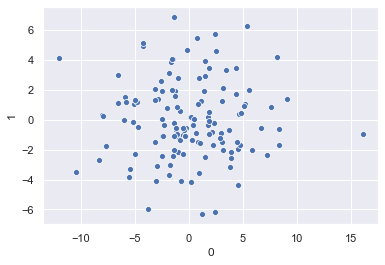

In [47]:
sns.scatterplot(x=0, y=1, data=df_pca_transformed_normed)

## Clustering

In [48]:
# GaussianMixture

In [49]:
def Do_Clustering_KMeans(components=2, data=df_pca_transformed_normed):
    ##
    clusterer = KMeans(n_clusters=components, random_state=0).fit(data)

    preds = clusterer.predict(data)

    centers = clusterer.cluster_centers_

    score = silhouette_score(data, preds)
    
    return score, preds, centers




### Finding Best Number of Clusters

In [50]:
number_of_components = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for n_components in number_of_components:
    score, _, _ = Do_Clustering_KMeans(components=n_components)
    print('With {} clusters, the silhouette coefficient is {:.3f}.'.format(n_components, score))

With 2 clusters, the silhouette coefficient is 0.232.
With 3 clusters, the silhouette coefficient is 0.177.
With 4 clusters, the silhouette coefficient is 0.195.
With 5 clusters, the silhouette coefficient is 0.168.
With 6 clusters, the silhouette coefficient is 0.197.
With 7 clusters, the silhouette coefficient is 0.184.
With 8 clusters, the silhouette coefficient is 0.175.
With 9 clusters, the silhouette coefficient is 0.150.
With 10 clusters, the silhouette coefficient is 0.177.
With 11 clusters, the silhouette coefficient is 0.161.
With 12 clusters, the silhouette coefficient is 0.161.
With 13 clusters, the silhouette coefficient is 0.166.
With 14 clusters, the silhouette coefficient is 0.177.


### Clustering

In [68]:
centers

array([[-2.82657198, -0.05984072, -0.167208  ,  0.1715508 ,  0.21256644,
        -0.04799872],
       [ 3.59309998,  0.07606871,  0.21255254, -0.21807305, -0.27021158,
         0.06101532]])

In [67]:
color

(1.0, 0.0, 0.75, 1.0)

In [95]:
def cluster_results(reduced_data, preds, centers, first_axis=0, second_axis=1, pca_samples=None):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''

    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = first_axis, y = second_axis, 
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Plot transformed sample points 
    if pca_samples is not None:
        ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
                   s = 150, linewidth = 4, color = 'black', marker = 'x');

    # Set plot title
    ax.set_title("Cluster Learning on PCA Data - Centroids Marked by Number");

In [96]:
_, preds, centers = Do_Clustering_KMeans(components=2)

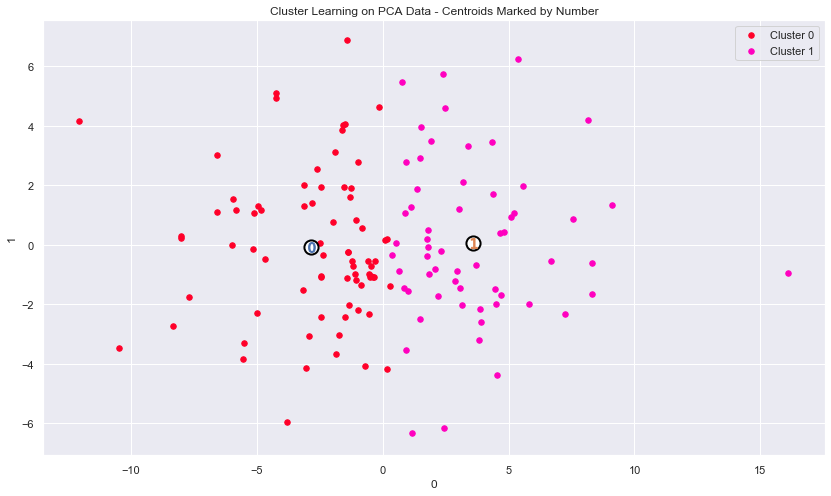

In [97]:
cluster_results(df_pca_transformed_normed, preds, centers, first_axis=0, second_axis=1)

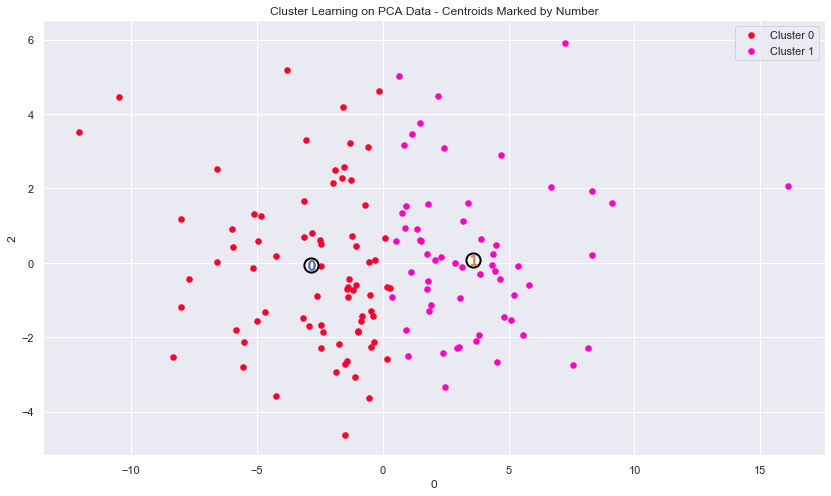

In [98]:
cluster_results(df_pca_transformed_normed, preds, centers, first_axis=0, second_axis=2)